In [ ]:
run(`git clone https://github.com/MaxJXiao/gaming.git`)
cd("gaming")
pwd()

Cloning into 'gaming'...


"/content/gaming"

In [ ]:
#@title Chess

files = ["a" "b" "c" "d" "e" "f" "g" "h"]
numbers = ["1" "2" "3" "4" "5" "6" "7" "8"]

fiddy_rule = [0]
material = [30]


"""
box_maker()

Save a couple of matrices to store past positions to see if there are any repeats.
"""
function box_maker(num::Int)
    vec = []
    for i ∈ 1:num
        append!(vec, [
            ["" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" ""]
        ])
    end

    return vec

end

white_repeat = box_maker(10)
black_repeat = box_maker(10)
w_repeat = Int.(zeros(1,10))
b_repeat = Int.(zeros(1,10))



r_white = ["" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "p" "p" "p" "p" "p" "p" "p" "p";
    "R" "N" "B" "Q" "K" "B" "N" "R"
]
w_castle = [0]
w_lrook = [0]
w_rrook = [0]
w_king = [8,5]


r_black = ["R" "N" "B" "Q" "K" "B" "N" "R";
    "p" "p" "p" "p" "p" "p" "p" "p";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" ""
]
b_castle = [0]
b_lrook = [0]
b_rrook = [0]
b_king = [1,5]


r_b = ["" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" ""
]


b = ["" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" ""
]


white = ["" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "p" "p" "p" "p" "p" "p" "p" "p";
    "R" "N" "B" "Q" "K" "B" "N" "R"
]


black = ["R" "N" "B" "Q" "K" "B" "N" "R";
"p" "p" "p" "p" "p" "p" "p" "p";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" ""
]


w_copy = ["" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "p" "p" "p" "p" "p" "p" "p" "p";
    "R" "N" "B" "Q" "K" "B" "N" "R"
]


b_copy = ["R" "N" "B" "Q" "K" "B" "N" "R";
"p" "p" "p" "p" "p" "p" "p" "p";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" ""
]


"""
board_reset()

Reset pieces
"""
function board_reset()
    white .= r_white
    black .= r_black
    b .= r_b

    w_king .= [8, 5]
    b_king .= [1, 5]

    w_castle[1] *= 0
    b_castle[1] *= 0
    w_lrook[1] *= 0
    b_lrook[1] *= 0
    w_rrook[1] *= 0
    b_rrook[1] *= 0

    white_repeat .= box_maker(10)
    black_repeat .= box_maker(10)
    w_repeat .= Int.(zeros(1,10))
    b_repeat .= Int.(zeros(1,10))
end


"""
w_reset()

Reset pieces for white
"""
function w_reset()
    white .= r_white

    w_castle[1] *= 0
    w_lrook[1] *= 0
    w_rrook[1] *= 0
end


"""
b_reset()

Reset pieces for black
"""
function b_reset()
    black .= r_black

    b_castle[1] *= 0
    b_lrook[1] *= 0
    b_rrook[1] *= 0
end


"""
board()

Show board with all pieces on
"""
function board()
    b .= r_b
    for i ∈ eachindex(white)
        if white[i] != ""
            b[i] = white[i]
        end
        if black[i] != ""
            b[i] = black[i]
        end

    end
    return b

end


"""
convert_file()

check which file we are talking about
"""
function convert_file(letter::SubString{String})
    for i ∈ 1:8
        if letter == files[i]
            return i
        end
    end
end


"""
piece_interception()

Figure out the squares that can intercept the movement
"""
function piece_interception(rank,col,og_rank,og_col)
    if rank != og_rank && col != og_col
        s_rank = []

        if rank > og_rank
            append!(s_rank, rank:-1:og_rank)
        elseif og_rank > rank
            append!(s_rank, rank:og_rank)
        end

        s_col = []

        if col > og_col
            append!(s_col, col:-1:og_col)
        elseif og_col > col
            append!(s_col, col:og_col)
        end


        indices = []

        l = length(s_rank)
        if l > 2
            for i ∈ 2:l-1
                append!(indices, [[s_rank[i], s_col[i]]])
            end
        end

    elseif rank != og_rank && col == og_col
        s_rank = []
        if abs(rank - og_rank) > 1
            if rank > og_rank
                i_rank = rank:-1:og_rank
                append!(s_rank, i_rank[2:end-1])
            else
                i_rank = rank:og_rank
                append!(s_rank, i_rank[2:end-1])
            end
        end

        indices = []

        l = length(s_rank)
        if l != 0
            for i ∈ 1:l
                append!(indices, [[s_rank[i], col]])
            end
        end

    elseif col != og_col && rank == og_rank
        s_col = []
        if abs(col - og_col) > 1
            if col > og_col
                i_col = col:-1:og_col
                append!(s_col, i_col[2:end-1])
            else
                i_col = col:og_col
                append!(s_col, i_col[2:end-1])
            end
        end

        indices = []

        l = length(s_col)
        if l != 0
            for i ∈ 1:l
                append!(indices, [[rank, s_col[i]]])
            end
        end

    end

    return indices
end


"""
line_of_sight()

See if black or white can block the movement
"""
function line_of_sight(cept::Vector{Any})
    l = length(cept)
    count = 0
    if l != 0

        for i ∈ 1:l
            if white[cept[i][1],cept[i][2]] != "" || black[cept[i][1],cept[i][2]] != ""
                count += 1
                break
            end

        end
    end

    return count

end


"""
remove_white_enpassant()

Remove the identifier that last turn was an en passant for white
"""
function remove_white_enpassant()
    for i ∈ 1:8
        if white[5,i] == "pe"
            white[5,i] = "p"
        end
    end
end


"""
remove_black_enpassant()

Remove the identifier that last turn was an en passant for black
"""
function remove_black_enpassant()
    for i ∈ 1:8
        if black[4,i] == "pe"
            black[4,i] = "p"
        end
    end
end


#################### MOVES ##########################


"""
white_move()

Figure out which piece white wants to move.

"""
function white_move(move::String)
    splitter = split(move, "")
    if splitter[1] ∈ files
        white_pawn(move)
    elseif splitter[1] == "N"
        white_knight(move)
    elseif splitter[1] == "B"
        white_bisharp(move)
    elseif splitter[1] == "R"
        white_rook(move)
        if w_castle == 0
            if white[8,1] != "R"
                w_lrook += 1
            elseif white[8,8] != "R"
                w_rrook += 1
            end
        end
    elseif splitter[1] == "Q"
        white_queen(move)
    elseif splitter[1] == "K"
        white_king(move)
        w_castle[1] += 1
    elseif splitter[1] == "O"
        white_castle(move)
    end
    remove_black_enpassant()
end


"""
black_move()

Figure out which piece black wants to move.

"""
function black_move(move::String)
    splitter = split(move, "")
    if splitter[1] ∈ files
        black_pawn(move)
    elseif splitter[1] == "N"
        black_knight(move)
    elseif splitter[1] == "B"
        black_bisharp(move)
    elseif splitter[1] == "R"
        black_rook(move)
        if b_castle == 0
            if black[1,1] != "R"
                b_lrook += 1
            elseif black[1,8] != "R"
                b_rrook += 1
            end
        end
    elseif splitter[1] == "Q"
        black_queen(move)
    elseif splitter[1] == "K"
        black_king(move)
        b_castle[1] += 1
    elseif splitter[1] == "O"
        black_castle(move)
    end
    remove_white_enpassant()
end


"""
white_pawn()

Move white pawn, simplified method probably
"""
function white_pawn(move::String)
    splitter = split(move, "")

    l = length(move)

    if l == 2
        col = convert_file(splitter[1])
        rank = 9 - parse(Int, splitter[2])

        if white_future(splitter[1], rank + 1, col, rank, col) == 1

            if white[rank + 1, col] == "p" && black[rank,col] == "" && white[rank,col] == ""
                white[rank + 1, col] = ""
                white[rank, col] = "p"
            elseif white[rank + 1, col] == "pe" && black[rank,col] == "" && white[rank,col] == ""
                white[rank + 1, col] = ""
                white[rank, col] = "p"
            end

        end

        if rank == 5 # change to 4 for black and + +> -

            if white_future(splitter[1], rank + 2, col, rank, col) == 1
                if white[rank + 2, col] == "p" &&
                    white[rank + 1, col] == "" && black[rank + 1, col] == "" &&
                    white[rank,col] == "" && black[rank,col] == ""
                        white[rank + 2, col] = ""
                        white[rank,col] = "pe"
                end
            end

        end

    elseif l == 4
        if splitter[2] == "8"
            col = convert_file(splitter[1])
            rank = 9 - parse(Int, splitter[2]) # for consistency for black

            if white_future(splitter[1], rank + 1, col, rank, col) == 1

                if white[rank + 1, col] == "p" && black[rank, col] == "" && white[rank,col] == ""
                    white[rank + 1, col] = ""
                    white[rank, col] = string(splitter[4])
                end

            end

        elseif splitter[2] == "x"
            og_col = convert_file(splitter[1])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            if white_future(splitter[1], rank + 1, og_col, rank, col) == 1

                if white[rank + 1, og_col] == "p" && black[rank, col] != "" &&
                    white[rank, col] == ""
                        white[rank + 1, og_col] = ""
                        white[rank, col] = "p"
                        black[rank, col] = ""
                elseif white[rank + 1, og_col] == "pe" && black[rank, col] != "" &&
                    white[rank,col] == ""
                        white[rank + 1, og_col] = ""
                        white[rank, col] = "p"
                        black[rank, col] = ""

                # en_passant
                elseif rank == 3 && white[rank + 1, og_col] == "p" &&
                    white[rank, col] == "" && black[rank, col] == "" &&
                    black[rank + 1, col] == "pe"
                        white[rank + 1, og_col] = ""
                        white[rank, col] = "p"
                        black[rank + 1, col] = ""
                end

            end

        end

    elseif l == 6
        og_col = convert_file(splitter[1])

        col = convert_file(splitter[3])
        rank = 9 - parse(Int, splitter[4])

        if white_future(splitter[1], rank + 1, og_col, rank, col) == 1


            if white[rank + 1, og_col] == "p" && black[rank, col] != "" &&
                white[rank, col] == ""
                    white[rank + 1, og_col] = ""
                    white[rank, col] = string(splitter[6])
                    black[rank, col] = ""
            end

        end

    end


end


"""
black_pawn()

Move black pawn, simplified method probably
"""
function black_pawn(move::String)
    splitter = split(move, "")

    l = length(move)

    if l == 2
        col = convert_file(splitter[1])
        rank = 9 - parse(Int, splitter[2])

        if black_future(splitter[1], rank - 1, col, rank, col) == 1

            if black[rank - 1, col] == "p" && white[rank,col] == "" && black[rank,col] == ""
                black[rank - 1, col] = ""
                black[rank, col] = "p"
            elseif black[rank - 1, col] == "pe" && white[rank,col] == "" && black[rank,col] == ""
                black[rank - 1, col] = ""
                black[rank, col] = "p"
            end

        end

        if rank == 4 # change to 4 for black and + +> -

            if black_future(splitter[1], rank - 2, col, rank, col) == 1
                if black[rank - 2, col] == "p" &&
                    black[rank - 1, col] == "" && white[rank - 1, col] == "" &&
                    black[rank,col] == "" && white[rank,col] == ""
                        black[rank - 2, col] = ""
                        black[rank, col] = "pe"
                end
            end
        end

    elseif l == 4
        if splitter[2] == "1"
            col = convert_file(splitter[1])
            rank = 9 - parse(Int, splitter[2]) # for consistency for black

            if black_future(splitter[1], rank - 1, col, rank, col) == 1

                if black[rank - 1, col] == "p" && white[rank, col] == "" && black[rank,col] == ""
                    black[rank - 1, col] = ""
                    black[rank, col] = string(splitter[4])
                end

            end

        elseif splitter[2] == "x"
            og_col = convert_file(splitter[1])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            if black_future(splitter[1], rank - 1, og_col, rank, col) == 1

                if black[rank - 1, og_col] == "p" && white[rank, col] != "" &&
                    black[rank, col] == ""
                        black[rank - 1, og_col] = ""
                        black[rank, col] = "p"
                        white[rank, col] = ""
                elseif black[rank - 1, og_col] == "pe" && white[rank, col] != "" &&
                    black[rank,col] == ""
                        black[rank - 1, og_col] = ""
                        black[rank, col] = "p"
                        white[rank, col] = ""

                # en_passant
                elseif rank == 6 && black[rank - 1, og_col] == "p" &&
                    black[rank, col] == "" && white[rank, col] == "" &&
                    white[rank - 1, col] == "pe"
                        black[rank - 1, og_col] = ""
                        black[rank, col] = "p"
                        white[rank - 1, col] = ""
                end

            end

        end

    elseif l == 6
        og_col = convert_file(splitter[1])

        col = convert_file(splitter[3])
        rank = 9 - parse(Int, splitter[4])

        if black_future(splitter[1], rank - 1, og_col, rank, col) == 1

            if black[rank - 1, og_col] == "p" && white[rank, col] != "" &&
                black[rank, col] == ""
                    black[rank - 1, og_col] = ""
                    black[rank, col] = string(splitter[6])
                    white[rank, col] = ""
            end

        end

    end


end


"""
white_knight()

Move the white knight.
"""
function white_knight(move::String)
    splitter = split(move, "")

    l = length(move)

    if l == 3
        col = convert_file(splitter[2])
        rank = 9 - parse(Int, splitter[3])

        for i ∈ knight_surround(rank, col)
            if white[i[1], i[2]] == "N" && black[rank, col] == "" && white[rank, col] == "" &&
                white_future(splitter[1], i[1], i[2], rank, col) == 1
                    white[i[1], i[2]] = ""
                    white[rank, col] = "N"
                    break
                end
        end

    elseif l == 4

        if splitter[2] == "x"
            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ knight_surround(rank,col)
                if white[i[1], i[2]] == "N" && black[rank, col] != "" && white[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        white[i[1], i[2]] = ""
                        white[rank, col] = "N"
                        black[rank, col] = ""
                        break
                end

            end

        elseif splitter[2] ∈ files # Nbd2
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int,splitter[4])

            for i ∈ knight_surround(rank, col)
                if white[i[1], i[2]] == "N" && i[2] == og_col &&
                    white[rank, col] == "" && black[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        white[i[1], i[2]] = ""
                        white[rank, col] = "N"
                        break
                end
            end

        elseif splitter[2] ∈ numbers # N3d4
            og_rank = 9 - parse(Int, splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ knight_surround(rank, col)
                if white[i[1], i[2]] == "N" && i[1] == og_rank &&
                    white[rank, col] == "" && black[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        white[i[1], i[2]] = ""
                        white[rank, col] = "N"
                        break
                end
            end

        end

    elseif l == 5
        if splitter[3] == "x"
            if splitter[2] ∈ files # Ncxe5
                og_col = convert_file(splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ knight_surround(rank, col)
                    if white[i[1], i[2]] == "N" && i[2] == og_col &&
                        white[rank, col] == "" && black[rank, col] != "" &&
                        white_future(splitter[1], i[1], i[2], rank, col) == 1
                            white[i[1], i[2]] = ""
                            white[rank, col] = "N"
                            black[rank, col] = ""
                            break
                    end
                end

            elseif splitter[2] ∈ numbers # N3xd4
                og_rank = 9 - parse(Int, splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ knight_surround(rank, col)
                    if white[i[1], i[2]] == "N" && i[1] == og_rank &&
                        white[rank, col] == "" && black[rank, col] != "" &&
                        white_future(splitter[1], i[1], i[2], rank, col) == 1
                            white[i[1], i[2]] = ""
                            white[rank, col] = "N"
                            black[rank, col] = ""
                            break
                    end
                end


            end

        elseif splitter[3] ∈ numbers # Nf2d3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[4])
            rank = 9 - parse(Int, splitter[5])

            if white[og_rank, og_col] == "N" && white[rank, col] == "" &&
                black[rank, col] == "" &&
                white_future(splitter[1], og_rank, og_col, rank, col) == 1
                    white[og_rank, og_col] = ""
                    white[rank, col] = "N"
            end

        end

    elseif l == 6
        if splitter[4] == "x" # Nf2xd3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[5])
            rank = 9 - parse(Int, splitter[6])

            if white[og_rank, og_col] == "N" && black[rank, col] != "" &&
                white[rank, col] == "" &&
                white_future(splitter[1], og_rank, og_rank, rank, col) == 1
                    white[og_rank, og_col] = ""
                    white[rank, col] = "N"
                    black[rank, col] = ""
            end

        end
    end

end


"""
black_knight()

Move the black knight.
"""
function black_knight(move::String)
    splitter = split(move, "")

    l = length(move)

    if l == 3
        col = convert_file(splitter[2])
        rank = 9 - parse(Int, splitter[3])

        for i ∈ knight_surround(rank, col)
            if black[i[1], i[2]] == "N" && white[rank, col] == "" && black[rank, col] == "" &&
                black_future(splitter[1], i[1], i[2], rank, col) == 1
                    black[i[1], i[2]] = ""
                    black[rank, col] = "N"
                    break
            end
        end

    elseif l == 4

        if splitter[2] == "x"
            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ knight_surround(rank,col)
                if black[i[1], i[2]] == "N" && white[rank, col] != "" && black[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        black[i[1], i[2]] = ""
                        black[rank, col] = "N"
                        white[rank, col] = ""
                        break
                end

            end

        elseif splitter[2] ∈ files # Nbd2
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int,splitter[4])

            for i ∈ knight_surround(rank, col)
                if black[i[1], i[2]] == "N" && i[2] == og_col &&
                    black[rank, col] == "" && white[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        black[i[1], i[2]] = ""
                        black[rank, col] = "N"
                        break
                end
            end

        elseif splitter[2] ∈ numbers # N3d4
            og_rank = 9 - parse(Int, splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ knight_surround(rank, col)
                if black[i[1], i[2]] == "N" && i[1] == og_rank &&
                    black[rank, col] == "" && white[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        black[i[1], i[2]] = ""
                        black[rank, col] = "N"
                        break
                end
            end

        end

    elseif l == 5
        if splitter[3] == "x"
            if splitter[2] ∈ files # Ncxe5
                og_col = convert_file(splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ knight_surround(rank, col)
                    if black[i[1], i[2]] == "N" && i[2] == og_col &&
                        black[rank, col] == "" && white[rank, col] != "" &&
                        black_future(splitter[1], i[1], i[2], rank, col) == 1
                            black[i[1], i[2]] = ""
                            black[rank, col] = "N"
                            white[rank, col] = ""
                            break
                    end
                end

            elseif splitter[2] ∈ numbers # N3xd4
                og_rank = 9 - parse(Int, splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ knight_surround(rank, col)
                    if black[i[1], i[2]] == "N" && i[1] == og_rank &&
                        black[rank, col] == "" && white[rank, col] != "" &&
                        black_future(splitter[1], i[1], i[2], rank, col) == 1
                            black[i[1], i[2]] = ""
                            black[rank, col] = "N"
                            white[rank, col] = ""
                            break
                    end
                end


            end

        elseif splitter[3] ∈ numbers # Nf2d3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[4])
            rank = 9 - parse(Int, splitter[5])

            if black[og_rank, og_col] == "N" && black[rank, col] == "" &&
                white[rank, col] == "" &&
                black_future(splitter[1], og_rank, og_col, rank, col) == 1
                    black[og_rank, og_col] = ""
                    black[rank, col] = "N"
            end

        end

    elseif l == 6
        if splitter[4] == "x" # Nf2xd3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[5])
            rank = 9 - parse(Int, splitter[6])

            if black[og_rank, og_col] == "N" && white[rank, col] != "" &&
                black[rank, col] == "" &&
                black_future(splitter[1], og_rank, og_col, rank, col) == 1
                    black[og_rank, og_col] = ""
                    black[rank, col] = "N"
                    white[rank, col] = ""
            end

        end
    end

end


"""
knight_surround()

find all the spots the knight could jump into the square from
"""
function knight_surround(rank, col)
    s_rank = []
    c_rank = []
    s_col = []
    c_col = []

    indices = []


    if rank - 2 > 0.5
        append!(s_rank, rank - 2)
        append!(c_rank, 2)
    end
    if rank - 1 > 0.5
        append!(s_rank, rank - 1)
        append!(c_rank, 1)
    end
    if rank + 2 < 8.5
        append!(s_rank, rank + 2)
        append!(c_rank, 2)
    end
    if rank + 1 < 8.5
        append!(s_rank, rank + 1)
        append!(c_rank, 1)
    end

    if col - 2 > 0.5
        append!(s_col, col - 2)
        append!(c_col, 2)
    end
    if col - 1 > 0.5
        append!(s_col, col - 1)
        append!(c_col, 1)
    end
    if col + 2 < 8.5
        append!(s_col, col + 2)
        append!(c_col, 2)
    end
    if col + 1 < 8.5
        append!(s_col, col + 1)
        append!(c_col, 1)
    end

    m = length(s_rank)
    n = length(s_col)

    for i ∈ 1:m
        for j ∈ 1:n
            if c_rank[i]^2 + c_col[j]^2 == 5
                append!(indices, [[s_rank[i],s_col[j]]])
            end
        end
    end

    return indices

end


"""
white_bisharp()

Move the white bisharp.
"""
function white_bisharp(move::String)
    splitter = split(move, "")

    l = length(move)

    if l == 3
        col = convert_file(splitter[2])
        rank = 9 - parse(Int, splitter[3])

        for i ∈ bisharp_surround(rank, col)
            if white[i[1], i[2]] == "B" && black[rank, col] == "" && white[rank, col] == "" &&
                white_future(splitter[1], i[1], i[2], rank, col) == 1

                    if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                        white[i[1], i[2]] = ""
                        white[rank, col] = "B"
                        break
                    end

            end
        end

    elseif l == 4

        if splitter[2] == "x"
            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ bisharp_surround(rank,col)
                if white[i[1], i[2]] == "B" && black[rank, col] != "" && white[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                            white[i[1], i[2]] = ""
                            white[rank, col] = "B"
                            black[rank, col] = ""
                            break
                        end
                end

            end

        elseif splitter[2] ∈ files # Nbd2
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int,splitter[4])

            for i ∈ bisharp_surround(rank, col)
                if white[i[1], i[2]] == "B" && i[2] == og_col &&
                    white[rank, col] == "" && black[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            white[i[1], i[2]] = ""
                            white[rank, col] = "B"
                            break
                        end
                end
            end

        elseif splitter[2] ∈ numbers # N3d4
            og_rank = 9 - parse(Int, splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ bisharp_surround(rank, col)
                if white[i[1], i[2]] == "B" && i[1] == og_rank &&
                    white[rank, col] == "" && black[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            white[i[1], i[2]] = ""
                            white[rank, col] = "B"
                            break
                        end
                end
            end

        end

    elseif l == 5
        if splitter[3] == "x"
            if splitter[2] ∈ files # Ncxe5
                og_col = convert_file(splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ bisharp_surround(rank, col)
                    if white[i[1], i[2]] == "B" && i[2] == og_col &&
                        white[rank, col] == "" && black[rank, col] != "" &&
                        white_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                white[i[1], i[2]] = ""
                                white[rank, col] = "B"
                                black[rank, col] = ""
                                break
                            end
                    end
                end

            elseif splitter[2] ∈ numbers # N3xd4
                og_rank = 9 - parse(Int, splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ bisharp_surround(rank, col)
                    if white[i[1], i[2]] == "B" && i[1] == og_rank &&
                        white[rank, col] == "" && black[rank, col] != "" &&
                        white_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                white[i[1], i[2]] = ""
                                white[rank, col] = "B"
                                black[rank, col] = ""
                                break
                            end
                    end
                end


            end

        elseif splitter[3] ∈ numbers # Nf2d3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[4])
            rank = 9 - parse(Int, splitter[5])

            if white[og_rank, og_col] == "B" && white[rank, col] == "" &&
                black[rank, col] == "" &&
                white_future(splitter[1], og_rank, og_col, rank, col) == 1
                    if line_of_sight(piece_interception(rank, col, og_rank, og_col)) == 0

                        white[og_rank, og_col] = ""
                        white[rank, col] = "B"

                    end
            end

        end

    elseif l == 6
        if splitter[4] == "x" # Nf2xd3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[5])
            rank = 9 - parse(Int, splitter[6])

            if white[og_rank, og_col] == "B" && black[rank, col] != "" &&
                white[rank, col] == "" &&
                white_future(splitter[1], og_rank, og_col, rank, col) == 1
                    if line_of_sight(piece_interception(rank, col, og_rank, og_col)) == 0

                        white[og_rank, og_col] = ""
                        white[rank, col] = "B"
                        black[rank, col] = ""
                    end
            end

        end
    end

end


"""
black_bisharp()

Move the black bisharp.
"""
function black_bisharp(move::String)
    splitter = split(move, "")

    l = length(move)

    if l == 3
        col = convert_file(splitter[2])
        rank = 9 - parse(Int, splitter[3])

        for i ∈ bisharp_surround(rank, col)
            if black[i[1], i[2]] == "B" && white[rank, col] == "" && black[rank, col] == "" &&
                black_future(splitter[1], i[1], i[2], rank, col) == 1
                    if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                        black[i[1], i[2]] = ""
                        black[rank, col] = "B"
                        break
                    end
            end
        end

    elseif l == 4

        if splitter[2] == "x"
            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ bisharp_surround(rank,col)
                if black[i[1], i[2]] == "B" && white[rank, col] != "" && black[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            black[i[1], i[2]] = ""
                            black[rank, col] = "B"
                            white[rank, col] = ""
                            break
                        end
                end

            end

        elseif splitter[2] ∈ files # Nbd2
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int,splitter[4])

            for i ∈ bisharp_surround(rank, col)
                if black[i[1], i[2]] == "B" && i[2] == og_col &&
                    black[rank, col] == "" && white[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            black[i[1], i[2]] = ""
                            black[rank, col] = "B"
                            break
                        end
                end
            end

        elseif splitter[2] ∈ numbers # N3d4
            og_rank = 9 - parse(Int, splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ bisharp_surround(rank, col)
                if black[i[1], i[2]] == "B" && i[1] == og_rank &&
                    black[rank, col] == "" && white[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            black[i[1], i[2]] = ""
                            black[rank, col] = "B"
                            break
                        end
                end
            end

        end

    elseif l == 5
        if splitter[3] == "x"
            if splitter[2] ∈ files # Ncxe5
                og_col = convert_file(splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ bisharp_surround(rank, col)
                    if black[i[1], i[2]] == "B" && i[2] == og_col &&
                        black[rank, col] == "" && white[rank, col] != "" &&
                        black_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                black[i[1], i[2]] = ""
                                black[rank, col] = "B"
                                white[rank, col] = ""
                                break
                            end
                    end
                end

            elseif splitter[2] ∈ numbers # N3xd4
                og_rank = 9 - parse(Int, splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ bisharp_surround(rank, col)
                    if black[i[1], i[2]] == "B" && i[1] == og_rank &&
                        black[rank, col] == "" && white[rank, col] != "" &&
                        black_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                black[i[1], i[2]] = ""
                                black[rank, col] = "B"
                                white[rank, col] = ""
                                break
                            end
                    end
                end


            end

        elseif splitter[3] ∈ numbers # Nf2d3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[4])
            rank = 9 - parse(Int, splitter[5])

            if black[og_rank, og_col] == "B" && black[rank, col] == "" &&
                white[rank, col] == "" &&
                black_future(splitter[1], og_rank, og_col, rank, col) == 1
                    if line_of_sight(piece_interception(rank,col,og_rank,og_col)) == 0

                        black[og_rank, og_col] = ""
                        black[rank, col] = "B"
                    end
            end

        end

    elseif l == 6
        if splitter[4] == "x" # Nf2xd3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[5])
            rank = 9 - parse(Int, splitter[6])

            if black[og_rank, og_col] == "B" && white[rank, col] != "" &&
                black[rank, col] == "" &&
                black_future(splitter[1], og_rank, og_col, rank, col) == 1
                    if line_of_sight(piece_interception(rank,col,og_rank,og_col)) == 0

                        black[og_rank, og_col] = ""
                        black[rank, col] = "B"
                        white[rank, col] = ""
                    end
            end

        end
    end

end


"""
bisharp_surround()

find all spots the bisharp could jump into the square from
"""
function bisharp_surround(rank, col)
    indices = []

    for i ∈ 1:7
        if rank - i > 0.5 && col - i > 0.5
            append!(indices, [[rank - i, col - i]])
        end
        if rank - i > 0.5 && col + i < 8.5
            append!(indices, [[rank - i, col + i]])
        end
        if rank + i < 8.5 && col - i > 0.5
            append!(indices, [[rank + i, col - i]])
        end
        if rank + i < 8.5 && col + i < 8.5
            append!(indices, [[rank + i, col + i]])
        end
    end

    return indices

end


"""
white_rook()

Move the white rook.
"""
function white_rook(move::String)
    splitter = split(move, "")

    l = length(move)

    if l == 3
        col = convert_file(splitter[2])
        rank = 9 - parse(Int, splitter[3])

        for i ∈ rook_surround(rank, col)
            if white[i[1], i[2]] == "R" && black[rank, col] == "" && white[rank, col] == "" &&
                white_future(splitter[1], i[1], i[2], rank, col) == 1

                    if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                        white[i[1], i[2]] = ""
                        white[rank, col] = "R"
                        break
                    end

            end
        end

    elseif l == 4

        if splitter[2] == "x"
            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ rook_surround(rank,col)
                if white[i[1], i[2]] == "R" && black[rank, col] != "" && white[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                            white[i[1], i[2]] = ""
                            white[rank, col] = "R"
                            black[rank, col] = ""
                            break
                        end
                end

            end

        elseif splitter[2] ∈ files # Nbd2
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int,splitter[4])

            for i ∈ rook_surround(rank, col)
                if white[i[1], i[2]] == "R" && i[2] == og_col &&
                    white[rank, col] == "" && black[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            white[i[1], i[2]] = ""
                            white[rank, col] = "R"
                            break
                        end
                end
            end

        elseif splitter[2] ∈ numbers # N3d4
            og_rank = 9 - parse(Int, splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ rook_surround(rank, col)
                if white[i[1], i[2]] == "R" && i[1] == og_rank &&
                    white[rank, col] == "" && black[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            white[i[1], i[2]] = ""
                            white[rank, col] = "R"
                            break
                        end
                end
            end

        end

    elseif l == 5
        if splitter[3] == "x"
            if splitter[2] ∈ files # Ncxe5
                og_col = convert_file(splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ rook_surround(rank, col)
                    if white[i[1], i[2]] == "R" && i[2] == og_col &&
                        white[rank, col] == "" && black[rank, col] != "" &&
                        white_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                white[i[1], i[2]] = ""
                                white[rank, col] = "R"
                                black[rank, col] = ""
                                break
                            end
                    end
                end

            elseif splitter[2] ∈ numbers # N3xd4
                og_rank = 9 - parse(Int, splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ rook_surround(rank, col)
                    if white[i[1], i[2]] == "R" && i[1] == og_rank &&
                        white[rank, col] == "" && black[rank, col] != "" &&
                        white_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                white[i[1], i[2]] = ""
                                white[rank, col] = "R"
                                black[rank, col] = ""
                                break
                            end
                    end
                end


            end

        elseif splitter[3] ∈ numbers # Nf2d3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[4])
            rank = 9 - parse(Int, splitter[5])

            if white[og_rank, og_col] == "R" && white[rank, col] == "" &&
                black[rank, col] == "" &&
                white_future(splitter[1], og_rank, og_col, rank, col) == 1
                    if line_of_sight(piece_interception(rank,col,og_rank,og_col)) == 0

                        white[og_rank, og_col] = ""
                        white[rank, col] = "R"

                    end
            end

        end

    elseif l == 6
        if splitter[4] == "x" # Nf2xd3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[5])
            rank = 9 - parse(Int, splitter[6])

            if white[og_rank, og_col] == "R" && black[rank, col] != "" &&
                white[rank, col] == "" &&
                white_future(splitter[1], og_rank, og_col, rank, col) == 1
                if line_of_sight(piece_interception(rank,col,og_rank,og_col)) == 0

                    white[og_rank, og_col] = ""
                    white[rank, col] = "R"
                    black[rank, col] = ""
                end
            end

        end
    end

end


"""
black_rook()

Move the black rook.
"""
function black_rook(move::String)
    splitter = split(move, "")

    l = length(move)

    if l == 3
        col = convert_file(splitter[2])
        rank = 9 - parse(Int, splitter[3])

        for i ∈ rook_surround(rank, col)
            if black[i[1], i[2]] == "R" && white[rank, col] == "" && black[rank, col] == "" &&
                black_future(splitter[1], i[1], i[2], rank, col) == 1
                    if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                        black[i[1], i[2]] = ""
                        black[rank, col] = "R"
                        break
                    end
            end
        end

    elseif l == 4

        if splitter[2] == "x"
            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ rook_surround(rank,col)
                if black[i[1], i[2]] == "R" && white[rank, col] != "" && black[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            black[i[1], i[2]] = ""
                            black[rank, col] = "R"
                            white[rank, col] = ""
                            break
                        end
                end

            end

        elseif splitter[2] ∈ files # Nbd2
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int,splitter[4])

            for i ∈ rook_surround(rank, col)
                if black[i[1], i[2]] == "R" && i[2] == og_col &&
                    black[rank, col] == "" && white[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            black[i[1], i[2]] = ""
                            black[rank, col] = "R"
                            break
                        end
                end
            end

        elseif splitter[2] ∈ numbers # N3d4
            og_rank = 9 - parse(Int, splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ rook_surround(rank, col)
                if black[i[1], i[2]] == "R" && i[1] == og_rank &&
                    black[rank, col] == "" && white[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            black[i[1], i[2]] = ""
                            black[rank, col] = "R"
                            break
                        end
                end
            end

        end

    elseif l == 5
        if splitter[3] == "x"
            if splitter[2] ∈ files # Ncxe5
                og_col = convert_file(splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ rook_surround(rank, col)
                    if black[i[1], i[2]] == "R" && i[2] == og_col &&
                        black[rank, col] == "" && white[rank, col] != "" &&
                        black_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                black[i[1], i[2]] = ""
                                black[rank, col] = "R"
                                white[rank, col] = ""
                                break
                            end
                    end
                end

            elseif splitter[2] ∈ numbers # N3xd4
                og_rank = 9 - parse(Int, splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ rook_surround(rank, col)
                    if black[i[1], i[2]] == "R" && i[1] == og_rank &&
                        black[rank, col] == "" && white[rank, col] != "" &&
                        black_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                black[i[1], i[2]] = ""
                                black[rank, col] = "R"
                                white[rank, col] = ""
                                break
                            end
                    end
                end


            end

        elseif splitter[3] ∈ numbers # Nf2d3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[4])
            rank = 9 - parse(Int, splitter[5])

            if black[og_rank, og_col] == "R" && black[rank, col] == "" &&
                white[rank, col] == "" &&
                black_future(splitter[1], og_rank, og_col, rank, col) == 1
                    if line_of_sight(piece_interception(rank,col,og_rank,og_col)) == 0

                        black[og_rank, og_col] = ""
                        black[rank, col] = "R"
                    end
            end

        end

    elseif l == 6
        if splitter[4] == "x" # Nf2xd3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[5])
            rank = 9 - parse(Int, splitter[6])

            if black[og_rank, og_col] == "R" && white[rank, col] != "" &&
                black[rank, col] == "" &&
                black_future(splitter[1], og_rank, og_col, rank, col) == 1
                    if line_of_sight(piece_interception(rank,col,og_rank,og_col)) == 0

                        black[og_rank, og_col] = ""
                        black[rank, col] = "R"
                        white[rank, col] = ""
                    end
            end

        end
    end

end


"""
rook_surround()

find all spots the rook could jump into the square from
"""
function rook_surround(rank, col)
    indices = []
    for i ∈ 1:7
        if rank - i > 0.5
            append!(indices, [[rank - i, col]])
        end
        if rank + i < 8.5
            append!(indices, [[rank + i, col]])
        end
        if col - i > 0.5
            append!(indices,[[rank, col - i]])
        end
        if col + i < 8.5
            append!(indices,[[rank, col + i]])
        end

    end

    return indices

end


"""
white_queen()

Move the white queen.
"""
function white_queen(move::String)
    splitter = split(move, "")

    l = length(move)

    if l == 3
        col = convert_file(splitter[2])
        rank = 9 - parse(Int, splitter[3])

        for i ∈ queen_surround(rank, col)
            if white[i[1], i[2]] == "Q" && black[rank, col] == "" && white[rank, col] == "" &&
                white_future(splitter[1], i[1], i[2], rank, col) == 1

                    if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                        white[i[1], i[2]] = ""
                        white[rank, col] = "Q"
                        break
                    end

            end
        end

    elseif l == 4

        if splitter[2] == "x"
            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ queen_surround(rank,col)
                if white[i[1], i[2]] == "Q" && black[rank, col] != "" && white[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                            white[i[1], i[2]] = ""
                            white[rank, col] = "Q"
                            black[rank, col] = ""
                            break
                        end
                end

            end

        elseif splitter[2] ∈ files # Nbd2
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int,splitter[4])

            for i ∈ queen_surround(rank, col)
                if white[i[1], i[2]] == "Q" && i[2] == og_col &&
                    white[rank, col] == "" && black[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            white[i[1], i[2]] = ""
                            white[rank, col] = "Q"
                            break
                        end
                end
            end

        elseif splitter[2] ∈ numbers # N3d4
            og_rank = 9 - parse(Int, splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ queen_surround(rank, col)
                if white[i[1], i[2]] == "Q" && i[1] == og_rank &&
                    white[rank, col] == "" && black[rank, col] == "" &&
                    white_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            white[i[1], i[2]] = ""
                            white[rank, col] = "Q"
                            break
                        end
                end
            end

        end

    elseif l == 5
        if splitter[3] == "x"
            if splitter[2] ∈ files # Ncxe5
                og_col = convert_file(splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ queen_surround(rank, col)
                    if white[i[1], i[2]] == "Q" && i[2] == og_col &&
                        white[rank, col] == "" && black[rank, col] != "" &&
                        white_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                white[i[1], i[2]] = ""
                                white[rank, col] = "Q"
                                black[rank, col] = ""
                                break
                            end
                    end
                end

            elseif splitter[2] ∈ numbers # N3xd4
                og_rank = 9 - parse(Int, splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ queen_surround(rank, col)
                    if white[i[1], i[2]] == "Q" && i[1] == og_rank &&
                        white[rank, col] == "" && black[rank, col] != "" &&
                        white_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                white[i[1], i[2]] = ""
                                white[rank, col] = "Q"
                                black[rank, col] = ""
                                break
                            end
                    end
                end


            end

        elseif splitter[3] ∈ numbers # Nf2d3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[4])
            rank = 9 - parse(Int, splitter[5])

            if white[og_rank, og_col] == "Q" && white[rank, col] == "" &&
                black[rank, col] == "" &&
                white_future(splitter[1], og_rank, og_col, rank, col) == 1
                if line_of_sight(piece_interception(rank,col,og_rank,og_col)) == 0

                    white[og_rank, og_col] = ""
                    white[rank, col] = "Q"

                end
            end

        end

    elseif l == 6
        if splitter[4] == "x" # Nf2xd3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[5])
            rank = 9 - parse(Int, splitter[6])

            if white[og_rank, og_col] == "Q" && black[rank, col] != "" &&
                white[rank, col] == "" &&
                white_future(splitter[1], og_rank, og_col, rank, col) == 1
                if line_of_sight(piece_interception(rank,col,og_rank,og_col)) == 0

                    white[og_rank, og_col] = ""
                    white[rank, col] = "Q"
                    black[rank, col] = ""
                end
            end

        end
    end

end


"""
black_queen()

Move the black queen.
"""
function black_queen(move::String)
    splitter = split(move, "")

    l = length(move)

    if l == 3
        col = convert_file(splitter[2])
        rank = 9 - parse(Int, splitter[3])

        for i ∈ queen_surround(rank, col)
            if black[i[1], i[2]] == "Q" && white[rank, col] == "" && black[rank, col] == "" &&
                black_future(splitter[1], i[1], i[2], rank, col) == 1
                    if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                        black[i[1], i[2]] = ""
                        black[rank, col] = "Q"
                        break
                    end
            end
        end

    elseif l == 4

        if splitter[2] == "x"
            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ queen_surround(rank,col)
                if black[i[1], i[2]] == "Q" && white[rank, col] != "" && black[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            black[i[1], i[2]] = ""
                            black[rank, col] = "Q"
                            white[rank, col] = ""
                            break
                        end
                end

            end

        elseif splitter[2] ∈ files # Nbd2
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int,splitter[4])

            for i ∈ queen_surround(rank, col)
                if black[i[1], i[2]] == "Q" && i[2] == og_col &&
                    black[rank, col] == "" && white[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            black[i[1], i[2]] = ""
                            black[rank, col] = "Q"
                            break
                        end
                end
            end

        elseif splitter[2] ∈ numbers # N3d4
            og_rank = 9 - parse(Int, splitter[2])

            col = convert_file(splitter[3])
            rank = 9 - parse(Int, splitter[4])

            for i ∈ queen_surround(rank, col)
                if black[i[1], i[2]] == "Q" && i[1] == og_rank &&
                    black[rank, col] == "" && white[rank, col] == "" &&
                    black_future(splitter[1], i[1], i[2], rank, col) == 1
                        if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                            black[i[1], i[2]] = ""
                            black[rank, col] = "Q"
                            break
                        end
                end
            end

        end

    elseif l == 5
        if splitter[3] == "x"
            if splitter[2] ∈ files # Ncxe5
                og_col = convert_file(splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ queen_surround(rank, col)
                    if black[i[1], i[2]] == "Q" && i[2] == og_col &&
                        black[rank, col] == "" && white[rank, col] != "" &&
                        black_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                black[i[1], i[2]] = ""
                                black[rank, col] = "Q"
                                white[rank, col] = ""
                                break
                            end
                    end
                end

            elseif splitter[2] ∈ numbers # N3xd4
                og_rank = 9 - parse(Int, splitter[2])

                col = convert_file(splitter[4])
                rank = 9 - parse(Int, splitter[5])

                for i ∈ queen_surround(rank, col)
                    if black[i[1], i[2]] == "Q" && i[1] == og_rank &&
                        black[rank, col] == "" && white[rank, col] != "" &&
                        black_future(splitter[1], i[1], i[2], rank, col) == 1
                            if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0

                                black[i[1], i[2]] = ""
                                black[rank, col] = "Q"
                                white[rank, col] = ""
                                break
                            end
                    end
                end


            end

        elseif splitter[3] ∈ numbers # Nf2d3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[4])
            rank = 9 - parse(Int, splitter[5])

            if black[og_rank, og_col] == "Q" && black[rank, col] == "" &&
                white[rank, col] == "" &&
                black_future(splitter[1], og_rank, og_col, rank, col) == 1
                    if line_of_sight(piece_interception(rank,col,og_rank,og_col)) == 0

                        black[og_rank, og_col] = ""
                        black[rank, col] = "Q"
                    end
            end

        end

    elseif l == 6
        if splitter[4] == "x" # Nf2xd3
            og_rank = 9 - parse(Int, splitter[3])
            og_col = convert_file(splitter[2])

            col = convert_file(splitter[5])
            rank = 9 - parse(Int, splitter[6])

            if black[og_rank, og_col] == "Q" && white[rank, col] != "" &&
                black[rank, col] == "" &&
                black_future(splitter[1], og_rank, og_col, rank, col) == 1
                    if line_of_sight(piece_interception(rank,col,og_rank,og_col)) == 0

                        black[og_rank, og_col] = ""
                        black[rank, col] = "Q"
                        white[rank, col] = ""
                    end
            end

        end
    end

end


"""
queen_surround()

find all spots the queen could jump into the square from
"""
function queen_surround(rank, col)
    return [rook_surround(rank, col); bisharp_surround(rank,col)]

end


"""
white_king()

Move the white king.
"""
function white_king(move::String)
    splitter = split(move, "")

    # position = (rank,col) want to see if king is directly adjacent to this

    l = length(move)

    if l == 3
        col = convert_file(splitter[2])
        rank = 9 - parse(Int, splitter[3])
        if white_check(rank, col) == 0
            for i ∈ king_surround(rank,col)
                if white[i[1],i[2]] == "K" && black[rank, col] == "" && white[rank, col] == ""
                    white[i[1], i[2]] = ""
                    white[rank,col] = "K"
                    w_king[1] = rank
                    w_king[2] = col
                    break
                end
            end
        end
    end


    if l == 4
        col = convert_file(splitter[3])
        rank = 9 - parse(Int, splitter[4])

        if white_check(rank, col) == 0
            for i ∈ king_surround(rank,col)
                if white[i[1], i[2]] == "K" && black[rank, col] != "" && white[rank, col] == ""
                    white[i[1], i[2]] = ""
                    white[rank,col] = "K"
                    black[rank,col] = ""
                    w_king[1] = rank
                    w_king[2] = col
                    break
                end
            end
        end
    end

end


"""
black_king()

Move the black king.
"""
function black_king(move::String)
    splitter = split(move,"")

    # position = (rank,col) want to see if king is directly adjacent to this

    l = length(move)

    if l == 3
        col = convert_file(splitter[2])
        rank = 9 - parse(Int, splitter[3])

        if black_check(rank, col) == 0
            for i ∈ king_surround(rank,col)
                if black[i[1],i[2]] == "K" && white[rank,col] == "" && black[rank,col] == ""
                    black[i[1], i[2]] = ""
                    black[rank,col] = "K"
                    b_king[1] = rank
                    b_king[2] = col
                    break
                end
            end
        end
    end


    if l == 4
        col = convert_file(splitter[3])
        rank = 9 - parse(Int, splitter[4])

        if black_check(rank,col) == 0
            for i ∈ king_surround(rank,col)
                if black[i[1],i[2]] == "K" && white[rank,col] != "" && black[rank,col] == ""
                    black[i[1], i[2]] = ""
                    black[rank,col] = "K"
                    white[rank,col] = ""
                    b_king[1] = rank
                    b_king[2] = col
                    break
                end
            end
        end
    end

end


"""
king_surround()

spaces that the king could come from
"""
function king_surround(rank::Int,col::Int)
    s_rank = [rank]
    if rank - 1 != 0
        append!(s_rank, rank - 1)
    end
    if rank + 1 != 9
        append!(s_rank, rank + 1)
    end

    s_col = [col]
    if col - 1 != 0
        append!(s_col, col - 1)
    end
    if col + 1 != 9
        append!(s_col, col + 1)
    end

    indices = []

    for i ∈ s_rank
        for j ∈ s_col
            if [i,j] != [rank,col]
                append!(indices, [[i,j]])
            end
        end
    end

    return indices

end


"""
white_castle()

Castle for white
"""
function white_castle(move::String)
    if w_castle[1] == 0
        if move == "O-O" && w_rrook[1] == 0
            if white[8,6] == "" && white[8,7] == "" &&
                black[8,6] == "" && black[8,7] == ""
                # check function see if king is in check on the [8,5], [8,6], [8,7]
                if white_check(8,5) == 0 && white_check(8,6) == 0 &&
                    white_check(8,7) == 0
                    white[8,5] = ""
                    white[8,7] = "K"
                    white[8,8] = ""
                    white[8,6] = "R"
                    w_castle[1] += 1000

                    w_king[1] = 8
                    w_king[2] = 7

                end
            end
        elseif move == "O-O-O" && w_lrook[1] == 0
            if white[8,4] == "" && white[8,3] == "" && white[8,2] == ""
                black[8,4] == "" && black[8,3] == "" && black[8,2] == ""
                if white_check(8,5) == 0 && white_check(8,4) == 0 &&
                    white_check(8,3) == 0
                    white[8,5] = ""
                    white[8,3] = "K"
                    white[8,1] = ""
                    white[8,4] = "R"
                    w_castle[1] += 1000

                    w_king[1] = 8
                    w_king[2] = 3
                end

            end
        end

    end
end


"""
black_castle()

Castle for black
"""
function black_castle(move::String)
    if b_castle[1] == 0
        if move == "O-O" && b_rrook[1] == 0
            if white[1,6] == "" && white[1,7] == "" &&
                black[1,6] == "" && black[1,7] == ""
                # check function see if king is in check on the [8,5], [8,6], [8,7]
                if black_check(1,5) == 0 && black_check(1,6) == 0 &&
                    black_check(1,7) == 0
                    black[1,5] = ""
                    black[1,7] = "K"
                    black[1,8] = ""
                    black[1,6] = "R"
                    b_castle[1] += 1000

                    b_king[1] = 1
                    b_king[2] = 7
                end
            end
        elseif move == "O-O-O" && b_lrook[1] == 0
            if white[1,4] == "" && white[1,3] == "" && white[1,2] == "" &&
                black[1,4] == "" && black[1,3] == "" && black[1,2] == ""
                if black_check(1,5) == 0 && black_check(1,4) == 0 &&
                    black_check(1,3) == 0
                    black[1,5] = ""
                    black[1,3] = "K"
                    black[1,1] = ""
                    black[1,4] = "R"
                    b_castle[1] += 1000

                    b_king[1] = 1
                    b_king[2] = 3
                end

            end
        end

    end
end


########################### Legality Checks #############################3


"""
white_check()

See if the white king is in check on those squares
"""
function white_check(rank, col)

    check = 0

    if rank > 2
        if col ∈ 2:7
            if black[rank - 1, col - 1] == "p" || black[rank - 1, col - 1] == "pe" ||
                black[rank - 1, col + 1] == "p" || black[rank - 1, col + 1] == "pe"
                    check += 1
            end
        end

        if col == 1
            if black[rank - 1, col + 1] == "p" || black[rank - 1, col + 1] == "pe"
                    check += 1
            end
        end

        if col == 8
            if black[rank - 1, col - 1] == "p" || black[rank - 1, col - 1] == "pe"
                check += 1
            end
        end
    end

    if check == 0

        n_squares = knight_surround(rank, col)
        n_len = length(n_squares)

        if n_len != 0
            for i ∈ n_squares
                if black[i[1], i[2]] == "N"
                    check += 1
                    break
                end
            end
        end

    end

    if check == 0

        k_squares = king_surround(rank, col)
        k_len = length(k_squares)

        if k_len != 0
            for i ∈ k_squares
                if black[i[1], i[2]] == "K"
                    check += 1
                    break
                end
            end
        end

    end


    if check == 0

        b_squares = bisharp_surround(rank, col)
        b_len = length(b_squares)
        if b_len != 0
            for i ∈ b_squares
                if black[i[1], i[2]] == "B" || black[i[1], i[2]] == "Q"
                    if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                        check += 1
                        break
                    end
                end
            end
        end

    end

    if check == 0
        r_squares = rook_surround(rank, col)
        r_len = length(r_squares)
        if r_len != 0
            for i ∈ r_squares
                if black[i[1], i[2]] == "R" || black[i[1], i[2]] == "Q"
                    if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                        check += 1
                        break
                    end
                end
            end
        end
    end

    return check
end


"""
black_check()

See if the black king is in check on those squares
"""
function black_check(rank, col)

    check = 0

    if rank < 7
        if col ∈ 2:7
            if white[rank + 1, col - 1] == "p" || white[rank + 1, col - 1] == "pe" ||
                white[rank + 1, col + 1] == "p" || white[rank + 1, col + 1] == "pe"
                    check += 1
            end
        end

        if col == 1
            if white[rank + 1, col + 1] == "p" || white[rank + 1, col + 1] == "pe"
                check += 1
            end
        end

        if col == 8
            if white[rank + 1, col - 1] == "p" || white[rank + 1, col - 1] == "pe"
                check += 1
            end
        end
    end

    if check == 0

        n_squares = knight_surround(rank, col)
        n_len = length(n_squares)

        if n_len != 0
            for i ∈ n_squares
                if white[i[1], i[2]] == "N"
                    check += 1
                    break
                end
            end
        end

    end


    if check == 0

        k_squares = king_surround(rank, col)
        k_len = length(k_squares)

        if k_len != 0
            for i ∈ k_squares
                if white[i[1], i[2]] == "K"
                    check += 1
                    break
                end
            end
        end

    end


    if check == 0

        b_squares = bisharp_surround(rank, col)
        b_len = length(b_squares)
        if b_len != 0
            for i ∈ b_squares
                if white[i[1], i[2]] == "B" || white[i[1], i[2]] == "Q"
                    if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                        check += 1
                        break
                    end
                end
            end
        end

    end

    if check == 0
        r_squares = rook_surround(rank, col)
        r_len = length(r_squares)
        if r_len != 0
            for i ∈ r_squares
                if white[i[1], i[2]] == "R" || white[i[1], i[2]] == "Q"
                    if line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                        check += 1
                        break
                    end
                end
            end
        end
    end

    return check
end


"""
white_future()

See if the white king is in check on a future move.
This is only necessary when not directly moving the king as the check for king moves are already done
"""
function white_future(piece::String, og_rank::Int, og_col::Int, rank::Int, col::Int)
    w_copy .= copy(white)
    b_copy .= copy(black)

    approve = 0

    w_copy[og_rank, og_col] = ""
    w_copy[rank, col] = piece
    b_copy[rank, col] = ""

    if string(piece) == "K"
        if white_future_check(rank, col) == 0
            approve += 1
        end
    elseif white_future_check(w_king[1], w_king[2]) == 0
        approve += 1
    end

    return approve
end
function white_future(piece::SubString{String}, og_rank::Int, og_col::Int, rank::Int, col::Int)
    w_copy .= copy(white)
    b_copy .= copy(black)

    approve = 0

    w_copy[og_rank, og_col] = ""
    w_copy[rank, col] = piece
    b_copy[rank, col] = ""

    if string(piece) == "K"
        if white_future_check(rank, col) == 0
            approve += 1
        end
    elseif white_future_check(w_king[1], w_king[2]) == 0
        approve += 1
    end

    return approve
end


"""
black_future()

See if the black king is in check on a future move.
This is only necessary when not directly moving the king as the check for king moves are already done
"""
function black_future(piece::String, og_rank::Int, og_col::Int, rank::Int, col::Int)
    w_copy .= copy(white)
    b_copy .= copy(black)

    approve = 0

    b_copy[og_rank, og_col] = ""
    b_copy[rank, col] = piece
    w_copy[rank, col] = ""

    if string(piece) == "K"
        if black_future_check(rank, col) == 0
            approve += 1
        end
    elseif black_future_check(b_king[1], b_king[2]) == 0
        approve += 1
    end

    return approve
end
function black_future(piece::SubString{String}, og_rank::Int, og_col::Int, rank::Int, col::Int)
    w_copy .= copy(white)
    b_copy .= copy(black)

    approve = 0

    b_copy[og_rank, og_col] = ""
    b_copy[rank, col] = piece
    w_copy[rank, col] = ""

    if string(piece) == "K"
        if black_future_check(rank, col) == 0
            approve += 1
        end
    elseif black_future_check(b_king[1], b_king[2]) == 0
        approve += 1
    end

    return approve
end


"""
white_future_check()

See if the white king is in check on those squares in the future
"""
function white_future_check(rank, col)

    check = 0

    if rank > 2
        if col ∈ 2:7
            if b_copy[rank - 1, col - 1] == "p" || b_copy[rank - 1, col - 1] == "pe" ||
                b_copy[rank - 1, col + 1] == "p" || b_copy[rank - 1, col + 1] == "pe"
                    check += 1
            end
        end

        if col == 1
            if b_copy[rank - 1, col + 1] == "p" || b_copy[rank - 1, col + 1] == "pe"
                    check += 1
            end
        end

        if col == 8
            if b_copy[rank - 1, col - 1] == "p" || b_copy[rank - 1, col - 1] == "pe"
                check += 1
            end
        end
    end


    if check == 0

        n_squares = knight_surround(rank, col)
        n_len = length(n_squares)

        if n_len != 0
            for i ∈ n_squares
                if b_copy[i[1], i[2]] == "N"
                    check += 1
                    break
                end
            end
        end

    end

    if check == 0

        k_squares = king_surround(rank, col)
        k_len = length(k_squares)

        if k_len != 0
            for i ∈ k_squares
                if b_copy[i[1], i[2]] == "K"
                    check += 1
                    break
                end
            end
        end

    end



    if check == 0

        b_squares = bisharp_surround(rank, col)
        b_len = length(b_squares)
        if b_len != 0
            for i ∈ b_squares
                if b_copy[i[1], i[2]] == "B" || b_copy[i[1], i[2]] == "Q"
                    if future_line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                        check += 1
                        break
                    end
                end
            end
        end

    end

    if check == 0
        r_squares = rook_surround(rank, col)
        r_len = length(r_squares)
        if r_len != 0
            for i ∈ r_squares
                if b_copy[i[1], i[2]] == "R" || b_copy[i[1], i[2]] == "Q"
                    if future_line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                        check += 1
                        break
                    end
                end
            end
        end
    end

    return check
end


"""
black_future_check()

See if the black king is in check on those squares in the future
"""
function black_future_check(rank, col)

    check = 0

    if rank < 7
        if col ∈ 2:7
            if w_copy[rank + 1, col - 1] == "p" || w_copy[rank + 1, col - 1] == "pe" ||
                w_copy[rank + 1, col + 1] == "p" || w_copy[rank + 1, col + 1] == "pe"
                    check += 1
            end
        end

        if col == 1
            if w_copy[rank + 1, col + 1] == "p" || w_copy[rank + 1, col + 1] == "pe"
                check += 1
            end
        end

        if col == 8
            if w_copy[rank + 1, col - 1] == "p" || w_copy[rank + 1, col - 1] == "pe"
                check += 1
            end
        end
    end


    if check == 0

        n_squares = knight_surround(rank, col)
        n_len = length(n_squares)

        if n_len != 0
            for i ∈ n_squares
                if w_copy[i[1], i[2]] == "N"
                    check += 1
                    break
                end
            end
        end

    end


    if check == 0

        k_squares = king_surround(rank, col)
        k_len = length(k_squares)

        if k_len != 0
            for i ∈ k_squares
                if w_copy[i[1], i[2]] == "K"
                    check += 1
                    break
                end
            end
        end

    end


    if check == 0

        b_squares = bisharp_surround(rank, col)
        b_len = length(b_squares)
        if b_len != 0
            for i ∈ b_squares
                if w_copy[i[1], i[2]] == "B" || w_copy[i[1], i[2]] == "Q"
                    if future_line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                        check += 1
                        break
                    end
                end
            end
        end

    end

    if check == 0
        r_squares = rook_surround(rank, col)
        r_len = length(r_squares)
        if r_len != 0
            for i ∈ r_squares
                if w_copy[i[1], i[2]] == "R" || w_copy[i[1], i[2]] == "Q"
                    if future_line_of_sight(piece_interception(rank,col,i[1],i[2])) == 0
                        check += 1
                        break
                    end
                end
            end
        end
    end

    return check
end


"""
future_line_of_sight()

See if black or white can block the movement on a future move
"""
function future_line_of_sight(cept::Vector{Any})
    l = length(cept)
    count = 0
    if l != 0

        for i ∈ 1:l
            if w_copy[cept[i][1],cept[i][2]] != "" || b_copy[cept[i][1],cept[i][2]] != ""
                count += 1
                break
            end

        end
    end

    return count

end

########### need to check legality of enpassant and castles
"""
white_legal()

Check all legal moves for white
"""
function white_legal()
    moves = []
    for i ∈ 1:8
        for j ∈ 1:8
            # move pawn 1
            if white[i, j] == "p" && white[i - 1, j] == "" &&
                black[i - 1, j] == "" &&
                white_future("p", i, j, i - 1, j) == 1
                    append!(moves, [[["p"], [i, j], [i - 1, j]]])
            end
            # move pawn 2
            if i == 7
                if white[i, j] == "p" && white[i - 1, j] == "" &&
                    white[i - 2, j] == "" && black[i - 2, j] == "" &&
                    black[i - 1, j] == "" &&
                    white_future("p", i, j, i - 2, j) == 1
                        append!(moves, [[["p"], [i, j], [i - 2, j]]])
                end
            end
            # pawn captures right
            if j == 1
                if white[i, j] == "p" && white[i - 1, j + 1] == "" &&
                    black[i - 1, j + 1] != "" &&
                    white_future("p", i, j, i - 1, j + 1) == 1
                        append!(moves, [[["p"], [i, j], [i - 1, j + 1]]])
                end
            end
            # pawn captures left
            if j == 8
                if white[i, j] == "p" && white[i - 1, j - 1] == "" &&
                    black[i - 1, j - 1] != "" &&
                    white_future("p", i, j, i - 1, j - 1) == 1
                        append!(moves, [[["p"], [i, j], [i - 1, j - 1]]])
                end
            end
            # pawn captures either way
            if j ∈ 2:7
                if white[i, j] == "p" && white[i - 1, j + 1] == "" &&
                    black[i - 1, j + 1] != "" &&
                    white_future("p", i, j, i - 1, j + 1) == 1
                        append!(moves, [[["p"], [i, j], [i - 1, j + 1]]])
                end

                if white[i, j] == "p" && white[i - 1, j - 1] == "" &&
                    black[i - 1, j - 1] != "" &&
                    white_future("p", i, j, i - 1, j - 1) == 1
                        append!(moves, [[["p"], [i, j], [i - 1, j - 1]]])
                end
            end


            ## En passant

            if i == 4 # black passantable is on rank 4
                if black[i,j] == "pe"
                    if j != 1 && white[i, j - 1] == "p" &&
                        white_future("p", i, j - 1, i - 1, j) == 1
                            append!(moves,[[["px"], [i, j - 1], [i - 1, j]]])
                    end
                    if j != 8 && white[i, j + 1] == "p" &&
                        white_future("p", i, j + 1, i - 1, j) == 1
                            append!(moves, [[["px"], [i, j + 1], [i - 1, j]]])
                    end
                end
            end

            ########

            if white[i, j] == "N"
                for l ∈ knight_surround(i, j)
                    if white[l[1], l[2]] == "" && white_future("N", i, j, l[1], l[2]) == 1
                        append!(moves, [[["N"] ,[i, j], [l[1], l[2]]]])
                    end
                end
            end

            if white[i, j] == "B"
                for l ∈ bisharp_surround(i, j)
                    if white[l[1], l[2]] == "" && white_future("B", i, j, l[1], l[2]) == 1 &&
                        line_of_sight(piece_interception(i, j, l[1], l[2])) == 0
                            append!(moves, [[["B"], [i, j], [l[1], l[2]]]])
                    end
                end
            end

            if white[i, j] == "R"
                for l ∈ rook_surround(i, j)
                    if white[l[1], l[2]] == "" && white_future("R", i, j, l[1], l[2]) == 1 &&
                        line_of_sight(piece_interception(i, j, l[1], l[2])) == 0
                            append!(moves, [[["R"], [i, j], [l[1], l[2]]]])
                    end
                end
            end

            if white[i, j] == "Q"
                for l ∈ queen_surround(i, j)
                    if white[l[1], l[2]] == "" && white_future("Q", i, j, l[1], l[2]) == 1 &&
                        line_of_sight(piece_interception(i, j, l[1], l[2])) == 0
                            append!(moves, [[["Q"], [i, j], [l[1], l[2]]]])
                    end
                end
            end

            if white[i, j] == "K"
                for l ∈ king_surround(i, j)
                    if white[l[1], l[2]] == "" && white_future("K", i, j, l[1], l[2]) == 1
                        append!(moves, [[["K"], [i, j], [l[1], l[2]]]])
                    end
                end
            end


        end
    end

    if w_castle[1] == 0
        if w_rrook[1] == 0
            l = length(w_king[2]:7)
            r_l = 0

            r_c = 0
            for i ∈ w_king[2]:7
                if black[8, i] == "" && white_check(8, i) == 0
                    if white[8, i] == "K" || white[8, i] == "R" || white[8, i] == ""
                        r_l += 1
                        if white[8, i] == "R"
                            r_c += 1
                        end
                    end
                end
            end



            if white[8, 8] == "R"
                r_c += 1
            end


            if r_l == l && r_c == 1
                if white[8, 6] == "" || white[8, 6] == "K"
                    if black[8, 6] == ""
                        append!(moves, [[["O-O"]]])
                    end
                end
            end
        end

        if w_lrook[1] == 0
            if w_king[2] == 2
                if white[8, 3] == "" && white[8, 4] == "" &&
                    black[8, 3] == "" && black[8, 4] == "" &&
                    white_check(8, 2) == 0 && white_check(8, 3) == 0
                        if white[8, 1] == "R"
                            append!(moves, [[["O-O-O"]]])
                        end
                end
            elseif w_king[2] > 2
                l = length(3:w_king[2])
                r_l = 0

                r_c = 0

                for i ∈ 3:w_king[2]
                    if black[8, i] == "" && white_check(8, i) == 0
                        if white[8, i] == "K" || white[8, i] == "R" || white[8, i] == ""
                            r_l += 1

                            if white[8, i] == "R"
                                r_c += 1
                            end
                        end
                    end
                end
                if r_l == l
                    if white[8, 4] == "K" || white[8, 4] == ""
                        if black[8, 4] == ""
                            if white[8, 1] == "R"
                                if white[8, 2] == "" && black[8, 2] == ""
                                    append!(moves, [[["O-O-O"]]])
                                end
                            elseif r_c == 0 && white[8,2] == "R"
                                append!(moves, [[["O-O-O"]]])
                            end
                        end
                    elseif r_c == 1
                        append!(moves, [[["O-O-O"]]])
                    end
                end
            end

        end
    end

    return moves
end


"""
black_legal()

Check all legal moves for black
"""
function black_legal()
    moves = []
    for i ∈ 1:8
        for j ∈ 1:8

            if black[i, j] == "p" && black[i + 1, j] == "" &&
                white[i + 1, j] == "" &&
                black_future("p", i, j, i + 1, j) == 1
                    append!(moves, [[["p"], [i, j], [i + 1, j]]])
            end

            if i == 2
                if black[i, j] == "p" && black[i + 1, j] == "" &&
                    black[i + 2, j] == "" && white[i + 2, j] == "" &&
                    white[i + 1, j] == "" &&
                    black_future("p", i, j, i + 2, j) == 1
                        append!(moves, [[["p"], [i, j], [i + 2, j]]])
                end
            end

            if j == 1
                if black[i, j] == "p" && black[i + 1, j + 1] == "" &&
                    white[i + 1, j + 1] != "" &&
                    black_future("p", i, j, i + 1, j + 1) == 1
                        append!(moves, [[["p"], [i, j], [i + 1, j + 1]]])
                end
            end

            if j == 8
                if black[i, j] == "p" && black[i + 1, j - 1] == "" &&
                    white[i + 1, j - 1] != "" &&
                    black_future("p", i, j, i + 1, j - 1) == 1
                        append!(moves, [[["p"], [i, j], [i + 1, j - 1]]])
                end
            end

            if j ∈ 2:7
                if black[i, j] == "p" && black[i + 1, j + 1] == "" &&
                    white[i + 1, j + 1] != "" &&
                    black_future("p", i, j, i + 1, j + 1) == 1
                        append!(moves, [[["p"], [i, j], [i + 1, j + 1]]])
                end

                if black[i, j] == "p" && black[i + 1, j - 1] == "" &&
                    white[i + 1, j - 1] != "" &&
                    black_future("p", i, j, i + 1, j - 1) == 1
                        append!(moves, [[["p"], [i, j], [i + 1, j - 1]]])
                end
            end


            if i == 5 # white passantable is on rank 5
                if white[i,j] == "pe"
                    if j != 1 && black[i, j - 1] == "p" &&
                        black_future("p", i, j - 1, i + 1, j) == 1
                            append!(moves,[[["px"], [i, j - 1], [i + 1, j]]])
                    end
                    if j != 8 && black[i, j + 1] == "p" &&
                        black_future("p", i, j + 1, i + 1, j) == 1
                            append!(moves, [[["px"], [i, j + 1], [i + 1, j]]])
                    end
                end
            end

            if black[i, j] == "N"
                for l ∈ knight_surround(i, j)
                    if black[l[1], l[2]] == "" && black_future("N", i, j, l[1], l[2]) == 1
                        append!(moves, [[["N"], [i, j], [l[1], l[2]]]])
                    end
                end
            end

            if black[i, j] == "B"
                for l ∈ bisharp_surround(i, j)
                    if black[l[1], l[2]] == "" && black_future("B", i, j, l[1], l[2]) == 1 &&
                        line_of_sight(piece_interception(i, j, l[1], l[2])) == 0
                            append!(moves, [[["B"], [i, j], [l[1], l[2]]]])
                    end
                end
            end

            if black[i, j] == "R"
                for l ∈ rook_surround(i, j)
                    if black[l[1], l[2]] == "" && black_future("R", i, j, l[1], l[2]) == 1 &&
                        line_of_sight(piece_interception(i, j, l[1], l[2])) == 0
                            append!(moves, [[["R"], [i, j], [l[1], l[2]]]])
                    end
                end
            end

            if black[i, j] == "Q"
                for l ∈ queen_surround(i, j)
                    if black[l[1], l[2]] == "" && black_future("Q", i, j, l[1], l[2]) == 1 &&
                        line_of_sight(piece_interception(i, j, l[1], l[2])) == 0
                            append!(moves, [[["Q"], [i, j], [l[1], l[2]]]])
                    end
                end
            end

            if black[i, j] == "K"
                for l ∈ king_surround(i, j)
                    if black[l[1], l[2]] == "" && black_future("K", i, j, l[1], l[2]) == 1
                        append!(moves, [[["K"], [i, j], [l[1], l[2]]]])
                    end
                end
            end


        end
    end


    if b_castle[1] == 0
        if b_rrook[1] == 0
            l = length(b_king[2]:7)
            r_l = 0

            r_c = 0
            for i ∈ b_king[2]:7
                if white[1, i] == "" && black_check(1, i) == 0
                    if black[1, i] == "K" || black[1, i] == "R" || black[1, i] == ""
                        r_l += 1
                        if black[1, i] == "R"
                            r_c += 1
                        end
                    end
                end
            end



            if black[1, 8] == "R"
                r_c += 1
            end


            if r_l == l && r_c == 1
                if black[1, 6] == "" || black[1, 6] == "K"
                    if white[1, 6] == ""
                        append!(moves, [[["O-O"]]])
                    end
                end
            end
        end

        if b_lrook[1] == 0
            if b_king[2] == 2
                if black[1, 3] == "" && black[1, 4] == "" &&
                    white[1, 3] == "" && white[1, 4] == "" &&
                    black_check(1, 2) == 0 && black_check(1, 3) == 0
                        if black[1, 1] == "R"
                            append!(moves, [[["O-O-O"]]])
                        end
                end
            elseif b_king[2] > 2
                l = length(3:b_king[2])
                r_l = 0

                r_c = 0

                for i ∈ 3:b_king[2]
                    if white[1, i] == "" && black_check(1, i) == 0
                        if black[1, i] == "K" || black[1, i] == "R" || black[1, i] == ""
                            r_l += 1

                            if black[1, i] == "R"
                                r_c += 1
                            end
                        end
                    end
                end
                if r_l == l
                    if black[1, 4] == "K" || black[1, 4] == ""
                        if white[1, 4] == ""
                            if black[1, 1] == "R"
                                if black[1, 2] == "" && white[1, 2] == ""
                                    append!(moves, [[["O-O-O"]]])
                                end

                            elseif r_c == 0 && black[1,2] == "R"
                                append!(moves, [[["O-O-O"]]])
                            end
                        end
                    elseif r_c == 1
                        append!(moves, [[["O-O-O"]]])
                    end
                end
            end

        end
    end

    return moves
end


"""
white_state()

For white, check if stalemate, checkmate or normal position
"""
function white_state()
    if length(white_legal()) == 0
        if white_check(w_king[1], w_king[2]) == 1
            return -200
        elseif white_check(w_king[1], w_king[2]) == 0
            return 0
        end
    elseif fiddy_rule[1] > 99 # 100 move rule as 50 moves each
        return 0
    else
        return 1
    end
end


"""
black_state()

For black, check if stalemate, checkmate or normal position
"""
function black_state()
    if length(black_legal()) == 0
        if black_check(b_king[1], b_king[2]) == 1
            return -200
        elseif black_check(b_king[1], b_king[2]) == 0
            return 0
        end
    elseif fiddy_rule[1] > 99
        return 0
    else
        return 1
    end
end


"""
white_automove()

For white, move using the format of a legal move.
"""
function white_automove(vec::AbstractVector)
    l = length(vec)
    if l == 1 && w_castle[1] == 0
        if string(vec[1][1]) == "O-O" && w_rrook[1] == 0
            for i ∈ w_king[2]:8
                if white[8, i] == "R"
                    white[8, i] = ""
                end
            end
            white[8, w_king[2]] = ""
            white[8, 7] = "K"
            white[8, 6] = "R"
            w_king[2] = 7
            w_castle[1] += 200
        elseif string(vec[1][1]) == "O-O-O" && w_lrook[1] == 0
            for i ∈ 1:w_king[2]
                if white[8, i] == "R"
                    white[8, i] = ""
                end
            end
            white[8, w_king[2]] = ""
            white[8, 3] = "K"
            white[8, 4] = "R"
            w_king[2] = 3
            w_castle[1] += 200
        end

    elseif l == 3
        if string(vec[1][1]) == "px"
            og_rank = vec[2][1]
            og_col = vec[2][2]
            rank = vec[3][1]
            col = vec[3][2]

            white[og_rank, og_col] = ""
            white[rank, col] = "p"
            black[og_rank, col] = ""

        elseif string(vec[1][1]) == "R" && w_castle[1] == 0
            og_rank = vec[2][1]
            og_col = vec[2][2]
            rank = vec[3][1]
            col = vec[3][2]

            white[og_rank, og_col] = ""
            white[rank, col] = string(vec[1][1])
            black[rank, col] = ""

            if og_rank > w_king[2]
                w_rrook[1] += 1
            elseif og_rank < w_king[2]
                w_lrook[1] += 1
            end

        elseif string(vec[1][1]) == "K"
            og_rank = vec[2][1]
            og_col = vec[2][2]
            rank = vec[3][1]
            col = vec[3][2]

            white[og_rank, og_col] = ""
            white[rank, col] = string(vec[1][1])
            black[rank, col] = ""

            w_castle[1] += 1
            w_king[1] = rank
            w_king[2] = col

        else
            og_rank = vec[2][1]
            og_col = vec[2][2]
            rank = vec[3][1]
            col = vec[3][2]

            if string(vec[1][1]) == "p" && rank == 1

                white[og_rank, og_col] = ""
                white[rank, col] = "Q"
                black[rank, col] = ""

            else
                white[og_rank, og_col] = ""
                white[rank, col] = string(vec[1][1])
                black[rank, col] = ""
            end

        end

    end

    remove_black_enpassant()
end


"""
black_automove()

For black, move using the format of a legal move.
"""
function black_automove(vec::AbstractVector)
    l = length(vec)
    if l == 1 && b_castle[1] == 0
        if string(vec[1][1]) == "O-O" && b_rrook[1] == 0
            for i ∈ b_king[2]:8
                if black[1, i] == "R"
                    black[1, i] = ""
                end
            end
            black[1, b_king[2]] = ""
            black[1, 7] = "K"
            black[1, 6] = "R"
            b_king[2] = 7
            b_castle[1] += 200
        elseif string(vec[1][1]) == "O-O-O" && b_lrook[1] == 0
            for i ∈ 1:b_king[2]
                if black[1, i] == "R"
                    black[1, i] = ""
                end
            end
            black[1, b_king[2]] = ""
            black[1, 3] = "K"
            black[8, 4] = "R"
            b_king[2] = 3
            b_castle[1] += 200
        end

    elseif l == 3
        if string(vec[1][1]) == "px"
            og_rank = vec[2][1]
            og_col = vec[2][2]
            rank = vec[3][1]
            col = vec[3][2]

            black[og_rank, og_col] = ""
            black[rank, col] = "p"
            white[og_rank, col] = ""

        elseif string(vec[1][1]) == "R" && w_castle[1] == 0
            og_rank = vec[2][1]
            og_col = vec[2][2]
            rank = vec[3][1]
            col = vec[3][2]

            black[og_rank, og_col] = ""
            black[rank, col] = string(vec[1][1])
            white[rank, col] = ""

            if og_rank > b_king[2]
                b_rrook[1] += 1
            elseif og_rank < b_king[2]
                b_lrook[1] += 1
            end

        elseif string(vec[1][1]) == "K"
            og_rank = vec[2][1]
            og_col = vec[2][2]
            rank = vec[3][1]
            col = vec[3][2]

            black[og_rank, og_col] = ""
            black[rank, col] = string(vec[1][1])
            white[rank, col] = ""
            b_castle[1] += 1

            b_king[1] = rank
            b_king[2] = col

        else
            og_rank = vec[2][1]
            og_col = vec[2][2]
            rank = vec[3][1]
            col = vec[3][2]

            if string(vec[1][1]) == "p" && rank == 8

                black[og_rank, og_col] = ""
                black[rank, col] = "Q"
                white[rank, col] = ""

            else
                black[og_rank, og_col] = ""
                black[rank, col] = string(vec[1][1])
                white[rank, col] = ""
            end

        end

    end

    remove_white_enpassant()
end


"""
white_random_move()

Make a random move for white.
"""
function white_random_move()

    choices = white_legal()
    l = length(choices)
    ran = rand(1:l)
    white_automove(choices[ran])

    mat = mat_count()
    m = sufficient_material(mat)
    fifty_move_rule(choices[ran], mat)

    return m

end


"""
black_random_move()

Make a random move for black.
"""
function black_random_move()

    choices = black_legal()
    l = length(choices)
    ran = rand(1:l)
    black_automove(choices[ran])

    mat = mat_count()
    m = sufficient_material(mat)
    fifty_move_rule(choices[ran], mat)

    return m

end


"""
mat_count()

Figure out if there is enough material for a checkmate.
"""
function mat_count()

    piece_white = [0, 0, 0, 0, 0] # [p, R, N, B, Q]
    for i ∈ eachindex(white)
        if white[i] == "p" || white[i] == "pe"
            piece_white[1] += 1
        elseif white[i] == "R"
            piece_white[2] += 1
        elseif white[i] == "N"
            piece_white[3] += 1
        elseif white[i] == "B"
            piece_white[4] += 1
        elseif white[i] == "Q"
            piece_white[5] += 1
        end
    end

    piece_black = [0, 0, 0, 0, 0] # [p, R, N, B, Q]
    for i ∈ eachindex(black)
        if black[i] == "p" || black[i] == "pe"
            piece_black[1] += 1
        elseif black[i] == "R"
            piece_black[2] += 1
        elseif black[i] == "N"
            piece_black[3] += 1
        elseif black[i] == "B"
            piece_black[4] += 1
        elseif black[i] == "Q"
            piece_black[5] += 1
        end
    end

    return [piece_white, piece_black]

end


"""
fifty_move_rule()

If a pawn move, a capture, or castles is made, reset the count.
"""
function fifty_move_rule(vec::AbstractVector, mat::AbstractVector)
    if string(vec[1][1]) == "p" || string(vec[1][1]) == "px" ||
        string(vec[1][1]) == "O-O" || string(vec[1][1]) == "O-O-O"
            fiddy_rule[1] *= 0
    elseif sum(sum(mat)) != material[1]
        fiddy_rule[1] *= 0
        material[1] == sum(sum(mat))
    else
        fiddy_rule[1] += 1
    end

end
function fifty_move_rule(vec::AbstractVector)

    mat = mat_count()
    if string(vec[1][1]) == "p" || string(vec[1][1]) == "px" ||
        string(vec[1][1]) == "O-O" || string(vec[1][1]) == "O-O-O"
            fiddy_rule[1] *= 0
    elseif sum(sum(mat)) != material[1]
        fiddy_rule[1] *= 0
        material[1] == sum(sum(mat))
    else
        fiddy_rule[1] += 1
    end

end

"""
sufficient_material()

Check whether or not there is sufficient mating material.
"""
function sufficient_material(mat::AbstractVector)

    if mat[1][1] != 0 || mat[2][1] != 0 || mat[1][2] != 0 || mat[2][2] != 0 ||
        mat[1][5] != 0 || mat[2][5] != 0
            return 1
    elseif mat[1][3] > 1 || mat[2][3] > 1 ||
        mat[1][4] > 1 || mat[2][4] > 1
            return 1
    elseif mat[1][3] == 1 && mat[1][4] == 1
        return 1
    elseif mat[2][3] == 1 && mat[2][4] == 1
        return 1
    else
        return 0
    end

end
function sufficient_material()

    mat = mat_count()

    if mat[1][1] != 0 || mat[2][1] != 0 || mat[1][2] != 0 || mat[2][2] != 0 ||
        mat[1][5] != 0 || mat[2][5] != 0
            return 1
    elseif mat[1][3] > 1 || mat[2][3] > 1 ||
        mat[1][4] > 1 || mat[2][4] > 1
            return 1
    elseif mat[1][3] == 1 && mat[1][4] == 1
        return 1
    elseif mat[2][3] == 1 && mat[2][4] == 1
        return 1
    else
        return 0
    end

end




"""
white_repeat_position()

Check how many times white has repeated the position.
"""
function white_repeat_position(move::Int)
    repeats = 0

    b = copy(board())
    count = Int((move + 1) / 2) ### white's turns come in 1, 3, 5, 7, 9, ...
    l = length(white_repeat)
    for i ∈ 1:l
        if b == white_repeat[i]
            w_repeat[i] += 1
        end
    end

    for i ∈ 1:l
        if w_repeat[i] == 2
            repeats += 2
        end
    end

    white_repeat[count % l + 1] = b
    w_repeat[count % l + 1] *= 0

    return repeats

end


"""
black_repeat_position()

Check how many times black has repeated the position.
"""
function black_repeat_position(move::Int)
    repeats = 0

    b = copy(board())
    count = Int(move / 2) ### white's turns come in 2, 4, 6, 8, 10, ...
    l = length(black_repeat)
    for i ∈ 1:l
        if b == black_repeat[i]
            b_repeat[i] += 1
        end
    end

    for i ∈ 1:l
        if b_repeat[i] == 2
            repeats += 2
        end
    end

    black_repeat[count % l + 1] = b
    b_repeat[count % l + 1] *= 0

    return repeats

end




######################### test boards ####################################


white = ["" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "" "B" "";
    "" "" "" "" "" "" "" "";
    "" "" "" "" "" "K" "" ""
]


black = ["" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "K" "" "";
"" "" "" "" "" "" "" "";
"" "" "" "" "" "" "" ""
]








############################# obselete code (redone better) ######################

"""
w_pawn()

Move white pawn, and make sure of en passant rule
"""
function w_pawn(move::String)
    splitter = split(move,"")
    col = convert_file(splitter[1])

    l = length(move)

    if l == 2
        rank = 9 - parse(Int,splitter[2])

        for i ∈ check_pawn_position(rank)
            if white[i, col] == "p" || white[i,col] == "pe"
                if i > rank && i - rank == 1 &&
                    black[rank,col] == "" && white[rank,col] == ""
                        white[i,col] = ""
                        white[rank,col] = "p"
                elseif i > rank && i - rank == 2 && i == 7 &&
                    black[rank,col] == "" && black[rank,col + 1] == "" &&
                    white[rank,col] == "" && white[rank,col + 1] == ""
                        white[i,col] = ""
                        white[rank,col] = "pe"
                end
            end
        end


    elseif l == 4
        if splitter[2] == "8"
            rank = 9-parse(Int,splitter[2])
            #print("yes")
            for i ∈ check_pawn_position(rank)
                if white[i, col] == "p"
                    if i > rank && i - rank == 1 &&
                        black[rank,col] == "" && white[rank,col] == ""
                            white[i,col] = ""
                            white[rank,col] = string(splitter[4])
                    end
                end
            end


        elseif splitter[2] == "x"
            rank = 9-parse(Int,splitter[4])
            take_file = convert_file(splitter[3])


            for i ∈ check_pawn_position(rank)
                if white[i, col] == "p" &&
                    black[rank,take_file] != "" &&
                    i > rank && i - rank == 1
                        white[i,col] = ""
                        white[rank,take_file] = "p"
                        black[rank,take_file] = ""
                        print("yes")

                elseif white[i, col] == "pe" &&
                    black[rank,take_file] != "" &&
                    i > rank && i - rank == 1
                        white[i,col] = ""
                        white[rank,take_file] = "p"
                        black[rank,take_file] = ""
                        print("yes")

                elseif white[i, col] == "p" && white[rank,take_file] == "" &&
                    black[rank + 1,take_file] == "pe" &&
                    i > rank && i - rank == 1
                        white[i,col] = ""
                        white[rank,take_file] = "p"
                        black[rank + 1,take_file] = ""
                        print("yes")
                end
            end



        end

    elseif l == 6
        rank = 9-parse(Int,splitter[4])
        take_file = convert_file(splitter[3])

        for i ∈ check_pawn_position(rank)
            if white[i, col] == "p" && black[rank,take_file] != "" &&
                i > rank && i - rank == 1
                    white[i,col] = ""
                    white[rank,take_file] = string(splitter[6])
                    black[rank,take_file] = ""

            end
        end



    end


end

"""
b_pawn()

Move black pawn, and make sure of en passant rule
"""
function b_pawn(move::String)
    splitter = split(move,"")
    col = convert_file(splitter[1])

    l = length(move)

    if l == 2
        rank = 9 - parse(Int,splitter[2])

        for i ∈ check_pawn_position(rank)
            if black[i, col] == "p" || black[i,col] == "pe"
                if i < rank && i - rank == -1 &&
                    black[rank,col] == "" && white[rank,col] == ""
                        black[i,col] = ""
                        black[rank,col] = "p"
                elseif i < rank && i - rank == -2 && i == 2 &&
                    black[rank,col] == "" && black[rank,col - 1] == "" &&
                    white[rank,col] == "" && white[rank,col - 1] == ""
                        black[i,col] = ""
                        black[rank,col] = "pe"
                end
            end
        end


    elseif l == 4
        if splitter[2] == "1"
            rank = 9-parse(Int,splitter[2])
            for i ∈ check_pawn_position(rank)
                if black[i, col] == "p"
                    if i < rank && i - rank == -1 &&
                        black[rank,col] == "" && white[rank,col] == ""
                            black[i,col] = ""
                            black[rank,col] = string(splitter[4])
                    end
                end
            end


        elseif splitter[2] == "x"
            rank = 9-parse(Int,splitter[4])
            take_file = convert_file(splitter[3])


            for i ∈ check_pawn_position(rank)
                if black[i, col] == "p" &&
                    white[rank,take_file] != "" &&
                    i < rank && i - rank == -1
                        black[i,col] = ""
                        black[rank,take_file] = "p"
                        white[rank,take_file] = ""


                elseif black[i, col] == "pe" &&
                    white[rank,take_file] != "" &&
                    i < rank && i - rank == -1
                        black[i,col] = ""
                        black[rank,take_file] = "p"
                        white[rank,take_file] = ""

                elseif black[i, col] == "p" && black[rank,take_file] == "" &&
                    white[rank - 1,take_file] == "pe" &&
                    i < rank && i - rank == -1
                        black[i,col] = ""
                        black[rank,take_file] = "p"
                        white[rank - 1,take_file] = ""
                        print("yes")


                end
            end



        end

    elseif l == 6
        rank = 9-parse(Int,splitter[4])
        take_file = convert_file(splitter[3])

        for i ∈ check_pawn_position(rank)
            if black[i, col] == "p" && white[rank,take_file] != "" &&
                i < rank && i - rank == -1
                    black[i,col] = ""
                    black[rank,take_file] = string(splitter[6])
                    white[rank,take_file] = ""

            end
        end



    end


end


"""
check_pawn_position()

indices 2-7 except future location of pawn
"""
function check_pawn_position(conv::Int)
    if conv == 1 || conv == 8
        return [2, 3, 4, 5, 6, 7]
    elseif conv ∈ 2:7
        indicies = [2, 3, 4, 5, 6, 7]
        deleteat!(indicies, conv-1)
        return indicies
    end
end

check_pawn_position

In [ ]:
#@title Chess Images

import Pkg

Pkg.add("FileIO")
Pkg.add("ImageShow")

using FileIO , ImageShow


img_white = joinpath(@__DIR__, "chess", "boardwhite_resized.png")
white_board = FileIO.load(img_white)

img_wpawn = joinpath(@__DIR__, "chess", "white-pawn.png")
wpawn = FileIO.load(img_wpawn)

img_wknight = joinpath(@__DIR__, "chess", "white-nightrd.png")
wknight = FileIO.load(img_wknight)

img_wbisharp = joinpath(@__DIR__, "chess", "white-bishop.png")
wbisharp = FileIO.load(img_wbisharp)

img_wrook = joinpath(@__DIR__, "chess", "white-rook.png")
wrook = FileIO.load(img_wrook)

img_wqueen = joinpath(@__DIR__, "chess", "white-queen.png")
wqueen = FileIO.load(img_wqueen)

img_wking = joinpath(@__DIR__, "chess", "white-king.png")
wking = FileIO.load(img_wking)



img_black = joinpath(@__DIR__, "chess", "boardblack_resized.png")
black_board = FileIO.load(img_black)

img_bpawn = joinpath(@__DIR__, "chess", "black-pawn.png")
bpawn = FileIO.load(img_bpawn)

img_bknight = joinpath(@__DIR__, "chess", "black-nightrd.png")
bknight = FileIO.load(img_bknight)

img_bbisharp = joinpath(@__DIR__, "chess", "black-bishop.png")
bbisharp = FileIO.load(img_bbisharp)

img_brook = joinpath(@__DIR__, "chess", "black-rook.png")
brook = FileIO.load(img_brook)

img_bqueen = joinpath(@__DIR__, "chess", "black-queen.png")
bqueen = FileIO.load(img_bqueen)

img_bking = joinpath(@__DIR__, "chess", "black-king.png")
bking = FileIO.load(img_bking)


im_bisharp = joinpath(@__DIR__, "chess", "bisharp (copy).png")
litbisharp = FileIO.load(im_bisharp)

im_shiny_bisharp = joinpath(@__DIR__, "chess", "shinybisharp (copy).png")
litshinybisharp = FileIO.load(im_shiny_bisharp)




############################################################################


simon = wpawn[1,1]
says = litbisharp[1,1]


white_board = FileIO.load(img_white)
whitepgn = copy(white_board);

black_board = FileIO.load(img_black)
blackpgn = copy(black_board);


function reset_white_board()
    whitepgn .= copy(white_board)
end

function reset_black_board()
    blackpgn .= copy(black_board)
end


"""
Show not to use the transparent part of image

for i ∈ 1:128
    for j ∈ 1:128
        if wpawn[i,j] == simon
        else
            whitepgn[i,j] = wpawn[i,j]
        end
    end
end
"""

"""
draw_white_pgn()

Use the white and black boards to make a complete image from the white side
"""
function draw_white_pgn()

    reset_white_board()

    for i ∈ 1:8
        for j ∈ 1:8


            if white[i,j] == "p" || white[i,j] == "pe"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if wpawn[m, n] == simon
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = wpawn[m,n]
                        end
                    end
                end
            end

            if white[i,j] == "N"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if wknight[m, n] == simon
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = wknight[m,n]
                        end
                    end
                end
            end

            if white[i,j] == "B"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if litbisharp[m, n] == says
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = litbisharp[m,n]
                        end
                    end
                end
            end

            if white[i,j] == "R"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if wrook[m, n] == simon
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = wrook[m,n]
                        end
                    end
                end
            end

            if white[i,j] == "Q"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if wqueen[m, n] == simon
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = wqueen[m,n]
                        end
                    end
                end
            end

            if white[i,j] == "K"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if wking[m, n] == simon
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = wking[m,n]
                        end
                    end
                end
            end

            #####################


            if black[i,j] == "p" || black[i,j] == "pe"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if bpawn[m, n] == simon
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = bpawn[m,n]
                        end
                    end
                end
            end

            if black[i,j] == "N"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if bknight[m, n] == simon
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = bknight[m,n]
                        end
                    end
                end
            end

            if black[i,j] == "B"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if litshinybisharp[m, n] == says
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = litshinybisharp[m,n]
                        end
                    end
                end
            end

            if black[i,j] == "R"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if brook[m, n] == simon
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = brook[m,n]
                        end
                    end
                end
            end

            if black[i,j] == "Q"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if bqueen[m, n] == simon
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = bqueen[m,n]
                        end
                    end
                end
            end

            if black[i,j] == "K"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if bking[m, n] == simon
                        else
                            whitepgn[(i - 1)*128 + m, (j - 1)*128 + n] = bking[m,n]
                        end
                    end
                end
            end

        end
    end


end

"""
draw_black_pgn()

Use the white and black boards to make a complete image from the black side
"""
function draw_black_pgn()

    reset_black_board()

    for i ∈ 1:8
        for j ∈ 1:8


            if white[i,j] == "p" || white[i,j] == "pe"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if wpawn[m, n] == simon
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = wpawn[m,n]
                        end
                    end
                end
            end

            if white[i,j] == "N"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if wknight[m, n] == simon
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = wknight[m,n]
                        end
                    end
                end
            end

            if white[i,j] == "B"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if litbisharp[m, n] == says
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = litbisharp[m,n]
                        end
                    end
                end
            end

            if white[i,j] == "R"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if wrook[m, n] == simon
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = wrook[m,n]
                        end
                    end
                end
            end

            if white[i,j] == "Q"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if wqueen[m, n] == simon
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = wqueen[m,n]
                        end
                    end
                end
            end

            if white[i,j] == "K"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if wking[m, n] == simon
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = wking[m,n]
                        end
                    end
                end
            end

            #####################


            if black[i,j] == "p" || black[i,j] == "pe"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if bpawn[m, n] == simon
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = bpawn[m,n]
                        end
                    end
                end
            end

            if black[i,j] == "N"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if bknight[m, n] == simon
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = bknight[m,n]
                        end
                    end
                end
            end

            if black[i,j] == "B"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if litshinybisharp[m, n] == says
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = litshinybisharp[m,n]
                        end
                    end
                end
            end

            if black[i,j] == "R"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if brook[m, n] == simon
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = brook[m,n]
                        end
                    end
                end
            end

            if black[i,j] == "Q"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if bqueen[m, n] == simon
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = bqueen[m,n]
                        end
                    end
                end
            end

            if black[i,j] == "K"
                for m ∈ 1:128
                    for n ∈ 1:128
                        if bking[m, n] == simon
                        else
                            blackpgn[(8 - i)*128 + m, (8 - j)*128 + n] = bking[m,n]
                        end
                    end
                end
            end

        end
    end


end



    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [5789e2e9] + FileIO v1.17.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
   Installed ImageShow ─ v0.3.8
    Updating `~/.julia/environments/v1.10/Project.toml`
  [4e3cecfd] + ImageShow v0.3.8
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [4e3cecfd] + ImageShow v0.3.8
Precompiling packages...
   2542.4 ms  ✓ ImageShow
  1 dependency successfully precompiled in 4 seconds. 435 already precompiled.


draw_black_pgn

In [38]:
#@title Chess PGN Maker


pre = ["a" "b" "c" "d" "e" "f" "g" "h" "N" "B" "R" "Q" "K" "O"]


"""
find_sequence()

find the sequence of moves to feed into the pgn maker.
"""
function find_sequence(pgn::String)
    snake = split(pgn, " ")

    moves = []
    for i ∈ eachindex(snake)
        if string(snake[i][1]) ∈ pre
            if string(snake[i][end]) == "#" || string(snake[i][end]) == "+"
                append!(moves, [string(snake[i][1:end-1])])
            else
                append!(moves, [snake[i]])
            end
        end
    end

    return moves

end






"""
white_gif_maker()

Make pngs to turn into gif later.
"""
function white_gif_maker(sequence::Vector{Any})

    board_reset()

    draw_white_pgn()
    save(joinpath(@__DIR__, "chess", "png", "1.png"), whitepgn)
    save(joinpath(@__DIR__, "chess", "png", "2.png"), whitepgn)
    save(joinpath(@__DIR__, "chess", "png", "3.png"), whitepgn)
    save(joinpath(@__DIR__, "chess", "png", "4.png"), whitepgn)
    save(joinpath(@__DIR__, "chess", "png", "5.png"), whitepgn)


    for i ∈ eachindex(sequence)
        if i % 2 == 1
            white_move(string(sequence[i] ))
        elseif i % 2 == 0
            black_move(string(sequence[i] ))
        end
        draw_white_pgn()
        save(joinpath(@__DIR__, "chess", "png", "$(i+5).png"), whitepgn)
    end

    # extend the end of the gif on final position

    l = length(sequence)
    for i ∈ l+1:l+3
        save(joinpath(@__DIR__, "chess", "png", "$(i+5).png"), whitepgn)
    end

end

"""
black_gif_maker()

Make pngs to turn into gif later.
"""
function black_gif_maker(sequence::Vector{Any})

    board_reset()

    draw_black_pgn()
    save(joinpath(@__DIR__, "chess", "png", "1.png"), blackpgn)
    save(joinpath(@__DIR__, "chess", "png", "2.png"), blackpgn)
    save(joinpath(@__DIR__, "chess", "png", "3.png"), blackpgn)
    save(joinpath(@__DIR__, "chess", "png", "4.png"), blackpgn)
    save(joinpath(@__DIR__, "chess", "png", "5.png"), blackpgn)

    for i ∈ eachindex(sequence)
        if i % 2 == 1
            white_move(string(sequence[i] ))
        elseif i % 2 == 0
            black_move(string(sequence[i] ))
        end
        draw_black_pgn()
        save(joinpath(@__DIR__, "chess", "png", "$(i+5).png"), blackpgn)
    end

    # extend the end of the gif on final position

    l = length(sequence)
    for i ∈ l+1:l+3
        save(joinpath(@__DIR__, "chess", "png", "$(i+5).png"), blackpgn)
    end

end








black_gif_maker

In [ ]:
## going to turn a pgn into a series of images

"""
Samples


1. e4 e6 2. Nf3 d5 3. Nc3 Nf6 4. e5 Nfd7 5. d4 c5 6. Bg5 Qb6 7. dxc5 Bxc5 8. Qd2 Bxf2+ 9. Qxf2 Qxb2 10. Kd2 Qxa1 11. Bb5 Qxh1 12. Qc5 Qxg2+ 13. Kc1 Nc6 14. Bxc6 f6 15. exf6 gxf6 16. Bxf6 Kf7 17. Qe7+ Kg6 18. Nh4+ Kh5 19. Nxg2 Nxf6 20. Qxf6 Bd7 21. Bxd7 Raf8 22. Qh4+ Kg6 23. Bxe6 Rf1+ 1-0


1. e4 c5 2. Nf3 e6 3. d4 cxd4 4. Nxd4 a6 5. Nc3 b5 6. a3 Bb7 7. Bd3 Bc5 8. Nb3 Ba7 9. Qg4 Nf6 10. Qg3 d6 11. O-O Nc6 12. Qxg7 Rg8 13. Qh6 Ne5 14. Bg5 Rg6 15. Bxf6 Qxf6 16. Qxh7 Nf3+ 17. Kh1 Ke7 18. Qh3 Nxh2 19. Nd5+ Bxd5 20. exd5 Nxf1 21. Kg1 Rh8 22. Qxh8 Qxf2+ 23. Kh1 Rh6+ 24. Qxh6 Qg1# 0-1


"""


###########################################

#Download FFMpeg and follow instructions from ffmpeg.txt

# Sample Game 1

In [21]:
folder_name = joinpath(@__DIR__, "chess", "png")

if isdir(folder_name)
    rm(folder_name, recursive=true)
    println("Folder '$folder_name' deleted successfully!")
else
    println("Folder '$folder_name' does not exist, skipping deletion.")
end

mkdir(folder_name)

# Change pgn string for different games

pgn₁ = "1. e4 e6 2. Nf3 d5 3. Nc3 Nf6 4. e5 Nfd7 5. d4 c5 6. Bg5 Qb6 7. dxc5 Bxc5 8. Qd2 Bxf2+ 9. Qxf2 Qxb2 10. Kd2 Qxa1 11. Bb5 Qxh1 12. Qc5 Qxg2+ 13. Kc1 Nc6 14. Bxc6 f6 15. exf6 gxf6 16. Bxf6 Kf7 17. Qe7+ Kg6 18. Nh4+ Kh5 19. Nxg2 Nxf6 20. Qxf6 Bd7 21. Bxd7 Raf8 22. Qh4+ Kg6 23. Bxe6 Rf1+ 1-0"

moves_1 = find_sequence(pgn₁)

white_gif_maker(moves_1)

zip_path = joinpath(@__DIR__, "chess_png.zip")

run(`zip -r $zip_path $folder_name`)

size = length(moves_1) + 8

print("Download chess_png.zip from the files on the side.")



Folder '/content/gaming/chess/png' deleted successfully!
updating: content/gaming/chess/png/ (stored 0%)
updating: content/gaming/chess/png/13.png (deflated 20%)
updating: content/gaming/chess/png/34.png (deflated 22%)
updating: content/gaming/chess/png/10.png (deflated 20%)
updating: content/gaming/chess/png/15.png (deflated 19%)
updating: content/gaming/chess/png/38.png (deflated 24%)
updating: content/gaming/chess/png/3.png (deflated 22%)
updating: content/gaming/chess/png/31.png (deflated 22%)
updating: content/gaming/chess/png/30.png (deflated 21%)
updating: content/gaming/chess/png/29.png (deflated 21%)
updating: content/gaming/chess/png/28.png (deflated 21%)
updating: content/gaming/chess/png/49.png (deflated 27%)
updating: content/gaming/chess/png/22.png (deflated 22%)
updating: content/gaming/chess/png/1.png (deflated 23%)
updating: content/gaming/chess/png/39.png (deflated 24%)
updating: content/gaming/chess/png/48.png (deflated 27%)
updating: content/gaming/chess/png/45.png 

# Sample Game 2

In [39]:
folder_name = joinpath(@__DIR__, "chess", "png")

if isdir(folder_name)
    rm(folder_name, recursive=true)
    println("Folder '$folder_name' deleted successfully!")
else
    println("Folder '$folder_name' does not exist, skipping deletion.")
end

mkdir(folder_name)

# Change pgn string for different games

pgn₂ = "1. e4 c5 2. Nf3 e6 3. d4 cxd4 4. Nxd4 a6 5. Nc3 b5 6. a3 Bb7 7. Bd3 Bc5 8. Nb3 Ba7 9. Qg4 Nf6 10. Qg3 d6 11. O-O Nc6 12. Qxg7 Rg8 13. Qh6 Ne5 14. Bg5 Rg6 15. Bxf6 Qxf6 16. Qxh7 Nf3+ 17. Kh1 Ke7 18. Qh3 Nxh2 19. Nd5+ Bxd5 20. exd5 Nxf1 21. Kg1 Rh8 22. Qxh8 Qxf2+ 23. Kh1 Rh6+ 24. Qxh6 Qg1# 0-1"

moves_2 = find_sequence(pgn₂)

black_gif_maker(moves_2)

zip_path = joinpath(@__DIR__, "chess_png.zip")

run(`zip -r $zip_path $folder_name`)

size = length(moves_2) + 8

print("Download chess_png.zip from the files on the side.")


Folder '/content/gaming/chess/png' deleted successfully!
updating: content/gaming/chess/png/ (stored 0%)
updating: content/gaming/chess/png/13.png (deflated 23%)
updating: content/gaming/chess/png/34.png (deflated 21%)
updating: content/gaming/chess/png/10.png (deflated 22%)
updating: content/gaming/chess/png/15.png (deflated 23%)
updating: content/gaming/chess/png/38.png (deflated 23%)
updating: content/gaming/chess/png/3.png (deflated 25%)
updating: content/gaming/chess/png/31.png (deflated 21%)
updating: content/gaming/chess/png/30.png (deflated 21%)
updating: content/gaming/chess/png/29.png (deflated 21%)
updating: content/gaming/chess/png/28.png (deflated 21%)
updating: content/gaming/chess/png/49.png (deflated 26%)
updating: content/gaming/chess/png/22.png (deflated 21%)
updating: content/gaming/chess/png/1.png (deflated 25%)
updating: content/gaming/chess/png/39.png (deflated 23%)
updating: content/gaming/chess/png/48.png (deflated 25%)
updating: content/gaming/chess/png/45.png 

# Cool Knights

In [ ]:
folder_name = joinpath(@__DIR__, "chess", "png")

if isdir(folder_name)
    rm(folder_name, recursive=true)
    println("Folder '$folder_name' deleted successfully!")
else
    println("Folder '$folder_name' does not exist, skipping deletion.")
end

mkdir(folder_name)

# Change pgn string for different games

pgn₃ = "1. a4 b6 2. Nf3 Ba6 3. Ng1 Bb5 4. axb5 a5 5. b3 a4 6. Ba3 Nc6 7. Bb4 Nb8 8. Ba5 bxa5 9. b4 Ra6 10. Ra3 Rc6 11. Rc3 Rd6 12. Rc6 dxc6 13. Na3 Rd3 14. cxd3 e6 15. Nb1 Bc5 16. e3 Bd4 17. exd4 f6 18. Be2 f5 19. Bf3 Nh6 20. Be4 fxe4 21. f4 Rf8 22. Ne2 Rf5 23. g4 Rg5 24. fxg5 Nf7 25. Rg1 g6 26. Rg3 Nh8 27. Rh3 Nf7 28. Rh5 gxh5 29. Ng1 Qf6 30. Ne2 Qf3 31. Ng1 Qg3+ 32. hxg3 a3 33. b6 a2 34. b7 a1=N 35. b5 Nd7 36. b8=N Nde5 37. b6 Nd7 38. b7 Nde5 39. Na6 Nd7 40. b8=N Nc5 41. d5 Nb7 42. d6 Nc5 43. d7+ Kf8 44. d8=N Nb7 45. g6 Nc5 46. g7+ Ke8 47. g8=N Ne5 48. g5 Kf8 49. g6 Kg7 50. g4 Kh8 51. d4 h6 52. g7+ Kh7 53. Ne7 h4 54. g8=N h3 55. g5 h2 56. d5 Kg7 57. d6 h1=N 58. Nf6 e3 59. Nc8 Kg6 60. d7 Kf5 61. g6 Kf4 62. g7 Kg3 63. g8=N a4 64. Nb7 a3 65. d8=N a2 66. d4 Nab3 67. d5 a1=N 68. d6 Ng6 69. Ke2 Nh4 70. d7 Na4 71. Kd3 Nc1+ 72. Ke4 c5 73. Ke5 c4 74. Nd5 c3 75. Kf6 c2 76. Ndc6 Ncb3 77. d8=N c1=N 78. Kg7 e5 79. Ndb6 e2 80. Na8 e1=N 81. N6a7 e4 82. Ncb6 e3 83. Nf3 e2 84. Nd4 Ned3 85. N4c6 e1=N 86. Nc3 h5 87. Nce7 c5 88. Nec8 c4 89. Ncd5 c3 90. Ndc7 c2 91. Ndc6 Na2 92. Nge7 c1=N 93. Kf8 Nhf3 94. Ke8 h4 95. Kd8 h3 96. Ncd6 h2 97. Kc8 Nhf2 98. N8d7 h1=N 99. Kb8 Nxd1 100. Nbd5 Kg2 101. Nab6 Ng3 102. Ka8 Kh1 103. Ncb8 Nf1 104. Ndc8 Ng2 105. Nec6 N3f2 106. Nde5 Nde3 107. Nf7 Neg4 108. Nfd8 Ne2 109. Ndb4 Nbd2 110. Nc2 Na2c3 111. Na3 Nce4 112. Nac4 Nac3 113. N4a5 Ncd1 114. Nac4 Nc2 115. N4a5 N4g3 116. Nac4 Nce3 117. N4a5 Nfg1 118. Nac4 Ngh2 119. N4a5 Ndf3 120. Nac4 Nef5 121. N4a5 Ng5 122. Nac4 Nde3 123. N4a5 Nc2 124. Nac4 Nce1 125. N4a5 N5f3 126. Nac4 Nef4 127. N4a5 N4h3 128. Nac4 N5h4 129. N4a5"

moves_3 = find_sequence(pgn₃)

white_gif_maker(moves_3)

zip_path = joinpath(@__DIR__, "chess_png.zip")

run(`zip -r $zip_path $folder_name`)

size = length(moves_3) + 8

print("Download chess_png.zip from the files on the side.")


#Alternatively, make a gif to download !!

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Plots.AnimatedGif("/content/gaming/chess.gif")
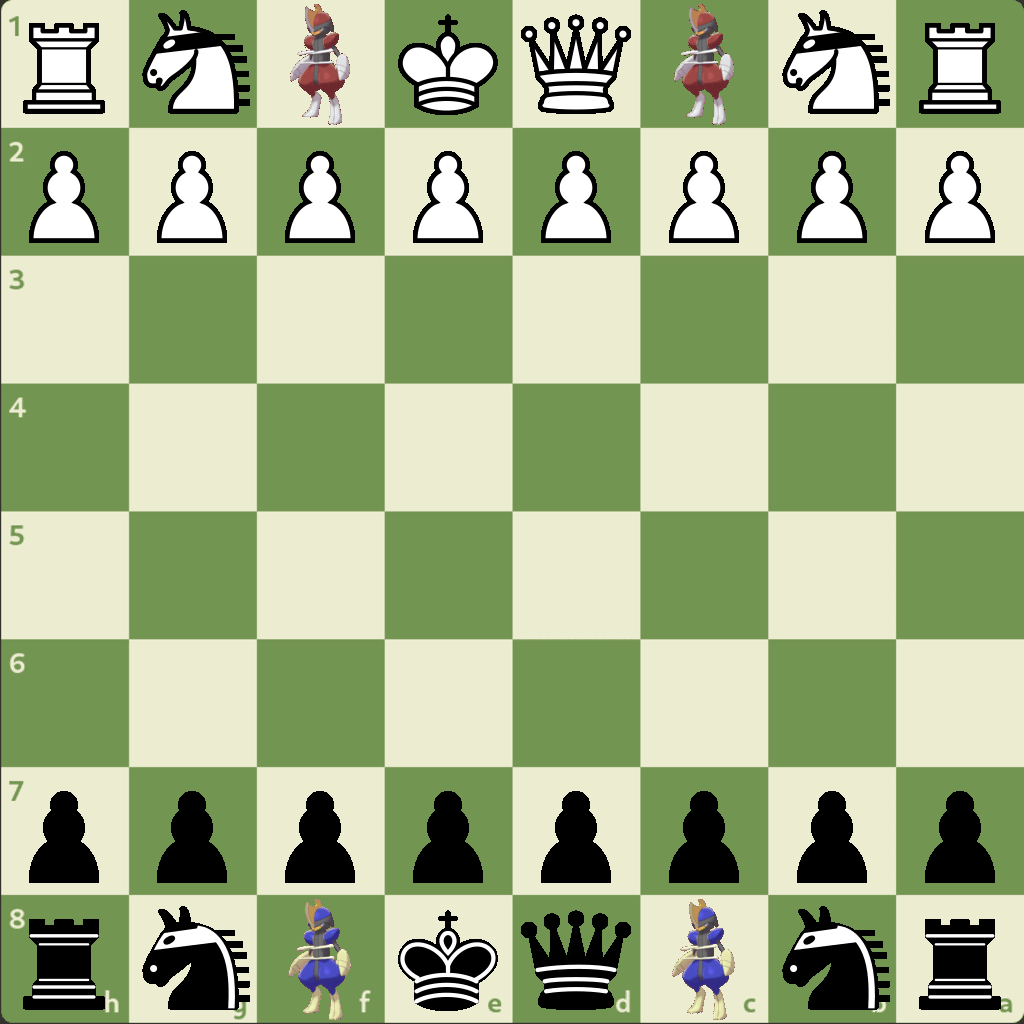

In [40]:
Pkg.add("Plots")
Pkg.add("FilePaths")

using FilePaths

import Printf.@sprintf
import Plots:Animation, buildanimation
nframes = size
for k ∈ 1:nframes
    old_name = @sprintf("%d.png", k)  # e.g., "1.png"
    new_name = @sprintf("%06d.png", k)  # e.g., "000001.png"
    old_path = folder_name * "/" * old_name
    new_path = folder_name * "/" * new_name
    mv(old_path, new_path; force=true)  # Rename file
end
fnames = [@sprintf("%06d.png", k) for k  in 1:nframes]
anim = Animation(folder_name, fnames); #PDF is the folder name which contains the pngs
buildanimation(anim, "chess.gif", fps = 1.5, show_msg=false) #set a suitable fps

###### Adjust Framerate above from 1.5 to else

# Right-Click Save